# <center> **Определение уязвимых групп населения** 

Описание всех таблиц:

➔ child_mortality_rural_1990_2021.xls — число умерших на первом году жизни детей за год, по всем регионам, в сельской местности.

➔ child_mortality_urban_1990_2021.xls — число умерших на первом году жизни детей за год, по всем регионам, в городской местности.

➔ disabled_total_by_age_2017_2022.csv — число людей с инвалидностью по регионам, по месяцам, по возрастным группам.

➔ morbidity_2005_2020_age_disease.xls — заболеваемость на 100 тыс. человек населения, по возрастным группам и группам заболеваний.

➔ poverty_percent_by_regions_1992_2020.csv — процент людей, живущих за чертой бедности (с денежными доходами ниже величины
прожиточного минимума), оценка за год по регионам.

➔ welfare_expense_share_2015_2020 — расходы на социальную политику от общих расходов бюджета региона, % в год*.

➔ cash_real_income_wages_2015_2020 — среднедушевые и реальные денежные доходы населения, номинальная и реальная начисленная
зарплата, по регионам*.

➔ poverty_socdem_20*.xls — распределение малоимущего населения по социально-демографическим группам (дети, трудящиеся,
пенсионеры) за 2017–2020 гг., по регионам.

➔ housing_2020 — характеристика жилищных условий домохозяйств. Оценка домохозяйствами состояния занимаемого ими жилого
помещения, обследование 2020 года*.

➔ population.xlsx — численность населения по регионам и федеральным округам на 1 января каждого года за 1999–2022 гг.

➔ gross_regional_product_1996_2020.xls — валовой региональный продукт на душу населения, в рублях.

Задача: 


* кластеризовать регионы России и определить, какие из них наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения;
* описать группы населения, сталкивающиеся с бедностью;
* определить:
    - влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе;
    - связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;
    - какие ещё зависимости можно наблюдать относительно социально незащищённых слоёв населения.


<center><img src=titul.png width=1000px height=400>

## 1. Исследование данных

In [115]:
# Все необходимые библиотеки для работы.

import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline
plt.style.use('bmh')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler

from IPython.display import display, HTML
display(HTML('<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>'))

Нам необходимо создать полноценный датасет для дальнейшей работы, для этого мы в него будем добавлять всю нашу информацию постепенно.

Для удобства, запишем сразу словарь с разными названиями регионов. 

In [116]:
dct_city = {'Архангельская область':'Архангельская обл.(кроме НАО)',
'Архангельская область (кроме Ненецкого автономного округа)':'Архангельская обл.(кроме НАО)',             
'Город Москва столица Российской Федерации город федерального значения':'Москва',
'Город Санкт-Петербург город федерального значения':'Санкт-Петербург',
'Город федерального значения Севастополь':'Севастополь',
'Кемеровская область - Кузбасс':'Кемеровская область',
'Ненецкий автономный округ (Архангельская область)': 'Ненецкий АО.(Арх.обл.)',
'Ненецкий автономный округ':'Ненецкий АО.(Арх.обл.)',
'Республика Адыгея (Адыгея)':'Республика Адыгея',
'Республика Татарстан (Татарстан)':'Республика Татарстан',
'Тюменская область':'Тюменская обл.(кроме ХМАО,ЯНАО)',
'Ханты-Мансийский автономный округ - Югра (Тюменская область)':'ХМАО(Тюменская обл.)',
'Чувашская Республика - Чувашия':'Чувашская Республика',
'Ямало-Ненецкий автономный округ (Тюменская область)':'ЯНАО(Тюменская обл.)',
'Ямало-Ненецкий автономный округ':'ЯНАО(Тюменская обл.)',
'г. Москва':'Москва',
'г. Санкт-Петербург':'Санкт-Петербург',
'г. Севастополь':'Севастополь',
'город Москва':'Москва',
'город Санкт-Петербург':'Санкт-Петербург',
'город Севастополь':'Севастополь',
'Республика Северная Осетия - Алания':'Республика Северная Осетия-Алания',
'Республика Северная Осетия — Алания': 'Республика Северная Осетия-Алания',
'Ямало-Ненецкий  автономный округ':'ЯНАО(Тюменская обл.)',
'Ханты-Мансийский  автономный округ - Югра':'ХМАО(Тюменская обл.)',
'Ханты-Мансийский автономный округ — Югра':'ХМАО(Тюменская обл.)',
'Ханты-Мансийский автономный округ':'ХМАО(Тюменская обл.)',
'Архангельская область без автономного округа':'Архангельская обл.(кроме НАО)',
'Тюменская область без автономных округов':'Тюменская обл.(кроме ХМАО,ЯНАО)',
'Архангельская область без авт. округа':'Архангельская обл.(кроме НАО)',
'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)':'Тюменская обл.(кроме ХМАО,ЯНАО)',
'Тюменская область без авт. округов':'Тюменская обл.(кроме ХМАО,ЯНАО)'}

### 1.1. Сбор данных

In [117]:
# выберем файл, где указаны все регионы.
df = pd.read_excel('./social_russia_data/poverty_socdem_2020.xls')

df = df.iloc[1:,0].reset_index(drop=True)
df = pd.DataFrame({'Регионы':df})
df['Регионы'] = df['Регионы'].apply(lambda x : x.strip())
df

,Регионы
0,Белгородская область
1,Брянская область
2,Владимирская область
3,Воронежская область
4,Ивановская область
...,...
82,Амурская область
83,Магаданская область
84,Сахалинская область
85,Еврейская автономная область


Удалим два региона, Тюменская и Архангельские области, т.к. они будут у нас расписаны как состав самой области и входящих в них автономных округов.

In [118]:
df.drop([20,61],inplace=True)
df = df.reset_index(drop=True)
df

,Регионы
0,Белгородская область
1,Брянская область
2,Владимирская область
3,Воронежская область
4,Ивановская область
...,...
80,Амурская область
81,Магаданская область
82,Сахалинская область
83,Еврейская автономная область


Итак у нас есть 85 регионов России. С ними мы будем работать.

In [119]:
# Приведем регионы к нашим стандартам.
df['Регионы'] = df['Регионы'].apply(lambda x :dct_city[x] if x in dct_city else x)

In [120]:
# 1. Численность населения 2020

# Прочитаем и запишем файл в переменную
data_population = pd.read_excel('./social_russia_data/population.xlsx')
data_population_2020 = data_population.iloc[2:,[0,23]]

data_population_2020.columns = ['region','Численность населения']

data_population_2020.iloc[:,1] = data_population_2020.iloc[:,1].shift(-1)
data_population_2020.dropna(inplace=True)
data_population_2020 = data_population_2020.reset_index(drop=True)

# Добавим в нашу таблицу столбец с наименованием федерального округа
mask_population = data_population_2020[(data_population_2020['region']).str.contains('федеральный')]

ind = mask_population.index
cols = list(mask_population['region'])


for num,value in enumerate(range(len(ind))):
    if num == len(mask_population.index)-1:
        v1 = ind[num]
        v2 = data_population_2020.index[-1] 
        data_population_2020.loc[v1:(v2),'Федеральный округ'] = cols[num]
    else:
        v1 = ind[num]
        v2 = ind[num+1]
        data_population_2020.loc[v1:(v2-1),'Федеральный округ'] = cols[num]

data_population_2020.head()

,region,Численность населения,Федеральный округ
0,Российская Федерация,146748590,NaN
1,Центральный федеральный округ,39433556,Центральный федеральный округ
2,Белгородская область,1549151,Центральный федеральный округ
3,Брянская область,1192491,Центральный федеральный округ
4,Владимирская область,1358416,Центральный федеральный округ


In [121]:
# Удалим строки с Тюменской и Архангельской областями
data_population_2020.drop([23,68],axis=0,inplace=True)

# Приведем названия регионов к общему виду, что бы данные подтянулись верно.
data_population_2020['region'] = data_population_2020['region'].apply(lambda x :dct_city[x] if x in dct_city else x)

In [122]:
# Подтянем данные к нашей таблице.
df = df.merge(right=data_population_2020,
           how='left',
           left_on='Регионы',
           right_on='region').drop(['region'],axis=1)

#  Отсортируем наши области по численности населения
df.sort_values(by='Численность населения',ascending=False,ignore_index=True,inplace=True)
df

,Регионы,Численность населения,Федеральный округ
0,Москва,12678079,Центральный федеральный округ
1,Московская область,7690863,Центральный федеральный округ
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016)
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ
4,Свердловская область,4310681,Уральский федеральный округ
...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ
81,Еврейская автономная область,158305,Дальневосточный федеральный округ
82,Магаданская область,140149,Дальневосточный федеральный округ
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ


In [123]:
# 2. новорождённые в этом месяце, по регионам, без учёта мертворождённых. Расчет взят на 15 июня каждого года.
data_newborn_2006_2022_monthly = pd.read_csv('./social_russia_data/newborn_2006_2022_monthly.csv',sep=';')
n = [0]

# Нам необходимо выделить 2020 год.
for num,value in enumerate(data_newborn_2006_2022_monthly.columns):
    lst = re.findall(r'\d{4}', value) 
    if len(lst) != 0: 
        if int(lst[0]) == 2020:
            n.append(num)
           
# Переименуем столбец        
data_newborn_2020 = data_newborn_2006_2022_monthly.iloc[:,n]
data_newborn_2020 = data_newborn_2020.rename(columns={'Region':'region'})

# Заменим запятые на точки
for i in data_newborn_2020.columns[1:]:
    data_newborn_2020[i] = data_newborn_2020[i].str.replace(',','.').astype('float')
mask = data_newborn_2020[data_newborn_2020.columns[1:]].sum(axis=1)

# Округлим данные    
data_newborn_2020 = pd.DataFrame({'region':data_newborn_2020['region'],'Новорожденные':np.round(mask)})

# Удалим строки с Тюменской и Архангельской областями, т.к. они ниже расписаны как области с АО и без него
data_newborn_2020.drop([23,71],axis=0,inplace=True)

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_newborn_2020['region'] = data_newborn_2020['region'].apply(lambda x :dct_city[x] if x in dct_city else x)

data_newborn_2020.head()


,region,Новорожденные
0,Российская Федерация,1435750.0
1,Центральный федеральный округ,354092.0
2,Белгородская область,12352.0
3,Брянская область,9480.0
4,Владимирская область,10120.0


In [124]:
# Присоединим данные
df = df.merge(right=data_newborn_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные
0,Москва,12678079,Центральный федеральный округ,123524.0
1,Московская область,7690863,Центральный федеральный округ,79107.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0
...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0


In [125]:
# 3.число умерших на первом году жизни детей за год, по всем регионам, в сельской местности. 

data_child_mortality_rural_1990_2021 = pd.read_excel('./social_russia_data/child_mortality_rural_1990_2021.xls')


data_child_mortality_rural_2020 = data_child_mortality_rural_1990_2021.iloc[2:,[0,33]]
data_child_mortality_rural_2020.columns = ['region','число умерших детей на первом году жизни в деревне 2020']
data_child_mortality_rural_2020['region'] = data_child_mortality_rural_2020['region'].apply(lambda x : x.strip())
data_child_mortality_rural_2020 = data_child_mortality_rural_2020.reset_index(drop=True)

# Удалим строки с Тюменской и Архангельской областями, т.к. они ниже расписаны как области с АО и без него
data_child_mortality_rural_2020.drop([23,71],axis=0,inplace=True)

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_child_mortality_rural_2020['region'] = data_child_mortality_rural_2020['region'].apply(lambda x :dct_city[x] if x in dct_city else x)

data_child_mortality_rural_2020.head()

,region,число умерших детей на первом году жизни в деревне 2020
0,Российская Федерация,1916.0
1,Центральный федеральный округ,228.0
2,Белгородская область,22.0
3,Брянская область,12.0
4,Владимирская область,10.0


In [126]:
# Присоединяем к основному датасету
df = df.merge(right=data_child_mortality_rural_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df 

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0
...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0


In [127]:
# 4. число умерших на первом году жизни детей за год, по всем регионам, в городской местности

data_child_mortality_urban_1990_2021 = pd.read_excel('./social_russia_data/child_mortality_urban_1990_2021.xls')
data_child_mortality_urban_2020 = data_child_mortality_urban_1990_2021.iloc[2:,[0,33]]
data_child_mortality_urban_2020.columns = ['region','число умерших детей на первом году жизни в городе 2020']
data_child_mortality_urban_2020['region'] = data_child_mortality_urban_2020['region'].apply(lambda x: x.strip())
data_child_mortality_urban_2020 = data_child_mortality_urban_2020.reset_index().drop(['index'],axis=1)

# Удалим строки с Тюменской и Архангельской областями, т.к. они ниже расписаны как области с АО и без него
data_child_mortality_urban_2020.drop([23,71],axis=0,inplace=True)

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_child_mortality_urban_2020['region'] = data_child_mortality_urban_2020['region'].apply(lambda x :dct_city[x] if x in dct_city else x)

data_child_mortality_urban_2020.head()

,region,число умерших детей на первом году жизни в городе 2020
0,Российская Федерация,4573.0
1,Центральный федеральный округ,1153.0
2,Белгородская область,25.0
3,Брянская область,29.0
4,Владимирская область,51.0


In [128]:
# Присоединяем к основному датасету
df = df.merge(right=data_child_mortality_urban_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0
...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0


In [129]:
# 5. число людей с инвалидностью по регионам, по месяцам, по возрастным группам.
data_disabled_total_by_age_2017_2022 = pd.read_csv('./social_russia_data/disabled_total_by_age_2017_2022.csv')
data_disabled_total_by_age_2017_2022['date'] = pd.to_datetime(data_disabled_total_by_age_2017_2022['date'],format='%Y-%m-%d')
dfc = data_disabled_total_by_age_2017_2022[data_disabled_total_by_age_2017_2022['date']=='2020-06-01']
data_disabled_total_by_age_2020 = dfc.groupby('region')[['total','18_30','31_40','41_50','51_60','60_']].sum().reset_index()
data_disabled_total_by_age_2020.columns = ['region','всего инвалидов','18_30_инвалид','31_40_инвалид','41_50_инвалид','51_60_инвалид','60_инвалид']

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_disabled_total_by_age_2020['region'] = data_disabled_total_by_age_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 

In [130]:
# Присоединяем к основному датасету
df = df.merge(right=data_disabled_total_by_age_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,51_60_инвалид,60_инвалид
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,135177.0,718314.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,65133.0,269936.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,73035.0,268746.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,56731.0,443593.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,40626.0,167167.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,3405.0,13053.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,1782.0,7462.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,946.0,2499.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,395.0,563.0


In [131]:
# 6. процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума), оценка за год по регионам

data_poverty_percent_by_regions_1992_2020 = pd.read_csv('./social_russia_data/poverty_percent_by_regions_1992_2020.csv')
data_poverty_percent_by_regions_1992_2020[data_poverty_percent_by_regions_1992_2020['year']==2020].iloc[:,[0,2]]
data_poverty_percent_by_regions_2020 = data_poverty_percent_by_regions_1992_2020[
    data_poverty_percent_by_regions_1992_2020['year']==2020].iloc[:,[0,2]]

data_poverty_percent_by_regions_2020 = data_poverty_percent_by_regions_2020.rename(columns={'poverty_percent':'за чертой бедности в %'})

# Уберем пробелы по краям строк
data_poverty_percent_by_regions_2020['region'] = data_poverty_percent_by_regions_2020['region'].apply(lambda x: x.strip())

# Удалим строки с Тюменской и Архангельской областями, т.к. они ниже расписаны как области с АО и без него
data_poverty_percent_by_regions_2020.drop([606,1672],axis=0,inplace=True)

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_poverty_percent_by_regions_2020['region'] = data_poverty_percent_by_regions_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 

data_poverty_percent_by_regions_2020.head()

,region,за чертой бедности в %
28,Российская Федерация,12.1
70,Белгородская область,7.2
96,Брянская область,13.6
122,Владимирская область,12.5
148,Воронежская область,8.5


In [132]:
# Присоединяем к основному датасету
df = df.merge(right=data_poverty_percent_by_regions_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)

df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,51_60_инвалид,60_инвалид,за чертой бедности в %
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,135177.0,718314.0,6.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,65133.0,269936.0,6.8
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,73035.0,268746.0,10.4
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,56731.0,443593.0,5.9
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,40626.0,167167.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,3405.0,13053.0,23.8
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,1782.0,7462.0,23.6
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,946.0,2499.0,8.7
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,395.0,563.0,8.0


In [133]:
# 7. распределение малоимущего населения по социально-демографическим группам (дети, трудящиеся, пенсионеры) за 2017–2020 гг., по регионам.
data_poverty_socdem_2021 = pd.read_excel('./social_russia_data/poverty_socdem_2021.xls',header=2,usecols=[0,2,3,4])
data_poverty_socdem_2021.columns=['region','% <16 за чертой бедности','% >60 за чертой бедности','% 16-60 за чертой бедности']

# удаляем пропуски по краям в названиях регионов 
data_poverty_socdem_2021['region'] = data_poverty_socdem_2021['region'].apply(lambda x: x.strip())

data_poverty_socdem_2021['region'] = data_poverty_socdem_2021['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 
data_poverty_socdem_2021.head()

,region,% <16 за чертой бедности,% >60 за чертой бедности,% 16-60 за чертой бедности
0,Российская Федерация,40.7,5.5,53.8
1,Центральный федеральный округ,0.0,0.0,0.0
2,Белгородская область,43.0,12.9,44.0
3,Брянская область,45.0,3.6,51.4
4,Владимирская область,36.4,4.9,58.7


In [134]:
# Добавляем данные в наш датасет.

df = df.merge(right=data_poverty_socdem_2021,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,51_60_инвалид,60_инвалид,за чертой бедности в %,% <16 за чертой бедности,% >60 за чертой бедности,% 16-60 за чертой бедности
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,135177.0,718314.0,6.0,28.7,15.0,56.3
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,65133.0,269936.0,6.8,43.4,6.6,50.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,73035.0,268746.0,10.4,43.4,6.7,49.9
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,56731.0,443593.0,5.9,36.6,4.2,59.2
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,40626.0,167167.0,9.0,46.0,3.6,50.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,3405.0,13053.0,23.8,42.9,1.8,55.3
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,1782.0,7462.0,23.6,36.5,7.8,55.7
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,946.0,2499.0,8.7,39.1,2.6,58.3
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,395.0,563.0,8.0,NaN,NaN,NaN


In [135]:
# 8. болезни
data_morbidity_2020_2021_age_disease = pd.read_excel('./social_russia_data/morbidity_2005_2020_age_disease.xls',
                                                     header=2,usecols=[0,1,2,3],
                                                     names=['region','вид болезни','возраст',2020,2021])

# удаляем пропуски по краям в названиях регионов 
data_morbidity_2020_2021_age_disease['region'] = data_morbidity_2020_2021_age_disease['region'].apply(lambda x: x.strip())

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_morbidity_2020_2021_age_disease['region'] = data_morbidity_2020_2021_age_disease['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 

# Убираем строки, если значения в столбцах вид болезни равно значению Все заболевания и в столбце Возраст Всего
data_morbidity_2020_2021_age_disease = data_morbidity_2020_2021_age_disease[(data_morbidity_2020_2021_age_disease['вид болезни'] !='Все заболевания')&(data_morbidity_2020_2021_age_disease['возраст'] !='Всего') ]

# складываем регионы и виды болезней,а остальные значения суммируем
data_morbidity_2020_2021_age_disease  = data_morbidity_2020_2021_age_disease.groupby(by =['region','вид болезни'],as_index=False).sum().round()
data_morbidity_2020 = data_morbidity_2020_2021_age_disease.pivot_table(columns='вид болезни',index='region',values=2020).reset_index()


data_morbidity_2020.head()

вид болезни,region,"Беременность, роды и послеродовой период",Болезни глаза и его придаточного аппарата,Болезни кожи и подкожной клетчатки,Болезни костно-мышечной системы и соединительной ткани,"Болезни крови, кроветворных органов и отдельные нарушения, вовлекающие иммунный механизм",Болезни мочеполовой системы,Болезни нервной системы,"Болезни нервной системы, болезни глаза и его придаточного аппарата, болезни уха и сосцевидного отростка",Болезни органов дыхания,...,Болезни системы кровообращения,Болезни уха и сосцевидного отростка,"Болезни эндокринной системы, расстройства питания и нарушения обмена веществ","Врожденные аномалии (пороки развития), деформации и хромосомные нарушения",Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин"
0,Алтайский край,10551.0,10070.0,14842.0,11309.0,1732.0,20306.0,5923.0,8131.0,243932.0,...,6834.0,6640.0,5426.0,981.0,7214.0,2979.0,659.0,3003.0,407.0,25545.0
1,Амурская область,4426.0,13860.0,15952.0,9032.0,1794.0,11059.0,4733.0,7418.0,209505.0,...,4667.0,10271.0,5094.0,1274.0,9099.0,1585.0,2560.0,1055.0,0.0,30574.0
2,Архангельская обл.(кроме НАО),8100.0,13396.0,21709.0,16367.0,2360.0,15316.0,6083.0,7992.0,255461.0,...,6802.0,10409.0,8564.0,1999.0,16704.0,3509.0,2732.0,2249.0,0.0,43801.0
3,Астраханская область,6271.0,11103.0,5483.0,7372.0,1107.0,9544.0,4330.0,6648.0,155093.0,...,4621.0,9619.0,7111.0,1966.0,6383.0,1367.0,2738.0,1266.0,0.0,16789.0
4,Белгородская область,4167.0,8897.0,13960.0,7890.0,908.0,13224.0,7061.0,10001.0,176037.0,...,5698.0,10052.0,3021.0,904.0,12796.0,1620.0,1442.0,1269.0,8.0,31244.0


In [136]:
# Добавляем данные в наш датасет.
df = df.merge(right=data_morbidity_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Болезни системы кровообращения,Болезни уха и сосцевидного отростка,"Болезни эндокринной системы, расстройства питания и нарушения обмена веществ","Врожденные аномалии (пороки развития), деформации и хромосомные нарушения",Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин"
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,2770.0,9026.0,3482.0,769.0,8440.0,2631.0,270.0,1215.0,0.0,34768.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,4544.0,8298.0,2453.0,521.0,8763.0,1983.0,907.0,1384.0,0.0,36166.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,8448.0,7310.0,4456.0,795.0,6248.0,1796.0,919.0,1083.0,1085.0,31054.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,6798.0,12750.0,6938.0,1845.0,15860.0,4348.0,1399.0,1922.0,0.0,40689.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,5346.0,8748.0,6037.0,614.0,9931.0,1594.0,2358.0,2096.0,781.0,28541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,4580.0,9046.0,5557.0,923.0,14954.0,2064.0,1455.0,515.0,714.0,20697.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,4634.0,4246.0,1652.0,1121.0,9180.0,1595.0,2098.0,644.0,7.0,18832.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,2438.0,5618.0,4140.0,1270.0,6592.0,1614.0,1687.0,1222.0,1401.0,37154.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,4600.0,9932.0,2234.0,999.0,15248.0,3387.0,114.0,3104.0,2502.0,35558.0


In [137]:
# 9.расходы на социальную политику от общих расходов бюджета региона, % в год*

data_welfare_expense_share_2020 = pd.read_excel('./social_russia_data/welfare_expense_share_2015_2020.xlsx',
                                                     usecols=[0,6],
                                                     names=['region','расходы на соц.пол. от бюджета %'])

# Убираем пробелы и переносы
data_welfare_expense_share_2020['region'] = data_welfare_expense_share_2020['region'].apply(lambda x: x.strip().replace('\n',' '))

data_welfare_expense_share_2020['region'] = data_welfare_expense_share_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_welfare_expense_share_2020['region'] = data_welfare_expense_share_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x) 

data_welfare_expense_share_2020.head()

,region,расходы на соц.пол. от бюджета %
0,Российская Федерация,21.3
1,Центральный федеральный округ,NaN
2,Белгородская область,16.1
3,Брянская область,23.1
4,Владимирская область,26.0


In [138]:
# Добавляем данные в наш датасет.
df = df.merge(right=data_welfare_expense_share_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Болезни уха и сосцевидного отростка,"Болезни эндокринной системы, расстройства питания и нарушения обмена веществ","Врожденные аномалии (пороки развития), деформации и хромосомные нарушения",Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин",расходы на соц.пол. от бюджета %
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,9026.0,3482.0,769.0,8440.0,2631.0,270.0,1215.0,0.0,34768.0,17.5
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,8298.0,2453.0,521.0,8763.0,1983.0,907.0,1384.0,0.0,36166.0,19.4
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,7310.0,4456.0,795.0,6248.0,1796.0,919.0,1083.0,1085.0,31054.0,25.7
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,12750.0,6938.0,1845.0,15860.0,4348.0,1399.0,1922.0,0.0,40689.0,19.8
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,8748.0,6037.0,614.0,9931.0,1594.0,2358.0,2096.0,781.0,28541.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,9046.0,5557.0,923.0,14954.0,2064.0,1455.0,515.0,714.0,20697.0,19.8
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,4246.0,1652.0,1121.0,9180.0,1595.0,2098.0,644.0,7.0,18832.0,31.2
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,5618.0,4140.0,1270.0,6592.0,1614.0,1687.0,1222.0,1401.0,37154.0,11.1
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,9932.0,2234.0,999.0,15248.0,3387.0,114.0,3104.0,2502.0,35558.0,6.4


In [139]:
# 10.среднедушевые денежные доходы населения
per_capita_cash_income_2019_2020 = pd.read_excel(
                io='./social_russia_data/cash_real_income_wages_2015_2020.xlsx',
                usecols=[0,6],
                names=['region','Среднедушевые доходы 2020'],
                sheet_name=0)

# Убираем пробелы и переносы
per_capita_cash_income_2019_2020['region'] = per_capita_cash_income_2019_2020['region'].apply(lambda x: x.strip().replace('\n',' '))

# Удаляем строки, которые касаются сумарным значениям Тюменской и Архангельской областей 
per_capita_cash_income_2019_2020 = per_capita_cash_income_2019_2020.drop([23,69]).reset_index(drop=True)

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
per_capita_cash_income_2019_2020['region'] = per_capita_cash_income_2019_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

per_capita_cash_income_2019_2020.head()

,region,Среднедушевые доходы 2020
0,Российская Федерация,36073.0
1,Центральный федеральный округ,48226.0
2,Белгородская область,32841.0
3,Брянская область,28596.0
4,Владимирская область,25922.0


In [140]:
# Добавляем данные в наш датасет.
df = df.merge(right=per_capita_cash_income_2019_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,"Болезни эндокринной системы, расстройства питания и нарушения обмена веществ","Врожденные аномалии (пороки развития), деформации и хромосомные нарушения",Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин",расходы на соц.пол. от бюджета %,Среднедушевые доходы 2020
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,3482.0,769.0,8440.0,2631.0,270.0,1215.0,0.0,34768.0,17.5,77283.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,2453.0,521.0,8763.0,1983.0,907.0,1384.0,0.0,36166.0,19.4,47046.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,4456.0,795.0,6248.0,1796.0,919.0,1083.0,1085.0,31054.0,25.7,36838.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,6938.0,1845.0,15860.0,4348.0,1399.0,1922.0,0.0,40689.0,19.8,49207.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,6037.0,614.0,9931.0,1594.0,2358.0,2096.0,781.0,28541.0,23.5,37374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,5557.0,923.0,14954.0,2064.0,1455.0,515.0,714.0,20697.0,19.8,21677.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,1652.0,1121.0,9180.0,1595.0,2098.0,644.0,7.0,18832.0,31.2,28048.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,4140.0,1270.0,6592.0,1614.0,1687.0,1222.0,1401.0,37154.0,11.1,70864.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,2234.0,999.0,15248.0,3387.0,114.0,3104.0,2502.0,35558.0,6.4,89541.0


In [141]:
# 11.реальные денежные доходы населения
Real_income_2020 = pd.read_excel('./social_russia_data/cash_real_income_wages_2015_2020.xlsx',sheet_name=1,usecols=[0,6])
Real_income_2020 = Real_income_2020.rename(columns={2020:'реальные доходы'}) 

# Удаляем строки, которые касаются сумарным значениям Тюменской и Архангельской областей 
Real_income_2020 = Real_income_2020.drop([23,69]).reset_index(drop=True)

# Убираем пробелы и переносы
Real_income_2020['region'] = Real_income_2020['region'].apply(lambda x: x.strip().replace('\n',' '))

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
Real_income_2020['region'] = Real_income_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)


Real_income_2020.head()

,region,реальные доходы
0,Российская Федерация,98.6
1,Центральный федеральный округ,98.7
2,Белгородская область,98.1
3,Брянская область,96.3
4,Владимирская область,98.0


In [142]:
# Добавляем данные в наш датасет.
df = df.merge(right=Real_income_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,"Врожденные аномалии (пороки развития), деформации и хромосомные нарушения",Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин",расходы на соц.пол. от бюджета %,Среднедушевые доходы 2020,реальные доходы
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,769.0,8440.0,2631.0,270.0,1215.0,0.0,34768.0,17.5,77283.0,100.2
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,521.0,8763.0,1983.0,907.0,1384.0,0.0,36166.0,19.4,47046.0,97.8
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,795.0,6248.0,1796.0,919.0,1083.0,1085.0,31054.0,25.7,36838.0,100.4
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,1845.0,15860.0,4348.0,1399.0,1922.0,0.0,40689.0,19.8,49207.0,101.1
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,614.0,9931.0,1594.0,2358.0,2096.0,781.0,28541.0,23.5,37374.0,92.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,923.0,14954.0,2064.0,1455.0,515.0,714.0,20697.0,19.8,21677.0,104.5
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,1121.0,9180.0,1595.0,2098.0,644.0,7.0,18832.0,31.2,28048.0,99.2
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,1270.0,6592.0,1614.0,1687.0,1222.0,1401.0,37154.0,11.1,70864.0,104.3
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,999.0,15248.0,3387.0,114.0,3104.0,2502.0,35558.0,6.4,89541.0,105.2


In [143]:
# 12.номинальная начисленная зарплата, по регионам.
Nominal_accrued_salary_2020 = pd.read_excel('./social_russia_data/cash_real_income_wages_2015_2020.xlsx',
                                            sheet_name=2,
                                            usecols=[0,6],
                                            names=['region','номинальная зарплата 2020'])

# Удаляем строки, которые касаются сумарным значениям Тюменской и Архангельской областей 
Nominal_accrued_salary_2020 = Nominal_accrued_salary_2020.drop([23,69]).reset_index(drop=True)

# Убираем пробелы и переносы
Nominal_accrued_salary_2020['region'] = Nominal_accrued_salary_2020['region'].apply(lambda x: x.strip().replace('\n',' '))

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
Nominal_accrued_salary_2020['region'] = Nominal_accrued_salary_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)


Nominal_accrued_salary_2020


,region,номинальная зарплата 2020
0,Российская Федерация,51344.0
1,Центральный федеральный округ,65319.0
2,Белгородская область,37442.0
3,Брянская область,31946.0
4,Владимирская область,35240.0
...,...,...
91,Амурская область,52430.0
92,Магаданская область,102843.0
93,Сахалинская область,92518.0
94,Еврейская автономная область,46237.0


In [144]:
# Добавляем данные в наш датасет.
df = df.merge(right=Nominal_accrued_salary_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Некоторые инфекционные и паразитарные болезни,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин",расходы на соц.пол. от бюджета %,Среднедушевые доходы 2020,реальные доходы,номинальная зарплата 2020
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,8440.0,2631.0,270.0,1215.0,0.0,34768.0,17.5,77283.0,100.2,100070.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,8763.0,1983.0,907.0,1384.0,0.0,36166.0,19.4,47046.0,97.8,58066.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,6248.0,1796.0,919.0,1083.0,1085.0,31054.0,25.7,36838.0,100.4,38499.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,15860.0,4348.0,1399.0,1922.0,0.0,40689.0,19.8,49207.0,101.1,68667.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,9931.0,1594.0,2358.0,2096.0,781.0,28541.0,23.5,37374.0,92.5,43256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,14954.0,2064.0,1455.0,515.0,714.0,20697.0,19.8,21677.0,104.5,36269.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,9180.0,1595.0,2098.0,644.0,7.0,18832.0,31.2,28048.0,99.2,46237.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,6592.0,1614.0,1687.0,1222.0,1401.0,37154.0,11.1,70864.0,104.3,102843.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,15248.0,3387.0,114.0,3104.0,2502.0,35558.0,6.4,89541.0,105.2,120641.0


In [145]:
# 13.Реальная начисленная зарплата по регионам
Real_accrued_salary_2020 = pd.read_excel('./social_russia_data/cash_real_income_wages_2015_2020.xlsx',
                                         sheet_name=3,
                                         usecols=[0,6],
                                         names=['region','начисленная зп. реал. 2020'])

# Удаляем строки, которые касаются сумарным значениям Тюменской и Архангельской областей 
Real_accrued_salary_2020 = Real_accrued_salary_2020.drop([23,69]).reset_index(drop=True)

# Убираем пробелы и переносы
Real_accrued_salary_2020['region'] = Real_accrued_salary_2020['region'].apply(lambda x: x.strip().replace('\n',' '))

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
Real_accrued_salary_2020['region'] = Real_accrued_salary_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

Real_accrued_salary_2020

,region,начисленная зп. реал. 2020
0,Российская Федерация,103.8
1,Центральный федеральный округ,104.2
2,Белгородская область,104.8
3,Брянская область,102.9
4,Владимирская область,103.0
...,...,...
91,Амурская область,105.2
92,Магаданская область,105.0
93,Сахалинская область,101.7
94,Еврейская автономная область,103.7


In [146]:
# Добавляем данные в наш датасет.
df = df.merge(right=Real_accrued_salary_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Новообразования,"Отдельные состояния, возникающие в перинатальном периоде",Психические расстройства и расстройства поведения,"Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях","Травмы, отравления и другие последствия воздействия внешних причин",расходы на соц.пол. от бюджета %,Среднедушевые доходы 2020,реальные доходы,номинальная зарплата 2020,начисленная зп. реал. 2020
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,2631.0,270.0,1215.0,0.0,34768.0,17.5,77283.0,100.2,100070.0,103.1
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,1983.0,907.0,1384.0,0.0,36166.0,19.4,47046.0,97.8,58066.0,101.8
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,1796.0,919.0,1083.0,1085.0,31054.0,25.7,36838.0,100.4,38499.0,103.2
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,4348.0,1399.0,1922.0,0.0,40689.0,19.8,49207.0,101.1,68667.0,101.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,1594.0,2358.0,2096.0,781.0,28541.0,23.5,37374.0,92.5,43256.0,102.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,2064.0,1455.0,515.0,714.0,20697.0,19.8,21677.0,104.5,36269.0,105.5
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,1595.0,2098.0,644.0,7.0,18832.0,31.2,28048.0,99.2,46237.0,103.7
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,1614.0,1687.0,1222.0,1401.0,37154.0,11.1,70864.0,104.3,102843.0,105.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,3387.0,114.0,3104.0,2502.0,35558.0,6.4,89541.0,105.2,120641.0,110.5


In [147]:
# Для дальнейшей работы нам понадобится добавить в наш словарь регионов новые названия
dct_city.update({
'Bладимирская область':'Владимирская область',
'Bолгоградская область':'Волгоградская область',
'Bологодская область':'Вологодская область',
'Bоронежская область':'Воронежская область',
'г.Москва':'Москва',
'Еврейская авт. область':'Еврейская автономная область',
'Ненецкий авт. округ':'Ненецкий АО.(Арх.обл.)',
'Республика Саха(Якутия)':'Республика Саха (Якутия)',
'Ханты-Мансийский авт. округ':'ХМАО(Тюменская обл.)',
'Чукотский авт. округ':'Чукотский автономный округ',
'Ямало-Ненецкий авт. округ':'ЯНАО(Тюменская обл.)'})

In [148]:
# 14.Характеристика жилищных условий домохозяйств, % от всех домохозяйств

#data_housing_2020_cond = pd.read_excel('./social_russia_data/housing_2020.xlsx',sheet_name='housing_cond',usecols=[0]+list(range(6,9)))

data_housing_2020_cond = pd.read_excel('./social_russia_data/housing_2020.xlsx',sheet_name='housing_cond',usecols=[0]+list(range(2,9)))

data_housing_2020_cond.rename(columns={'Регион':'region'},inplace=True)

# Убираем пробелы и переносы
data_housing_2020_cond['region'] = data_housing_2020_cond['region'].apply(lambda x: x.strip().replace('\n',' '))

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_housing_2020_cond['region'] = data_housing_2020_cond['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

data_housing_2020_cond

,region,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Российская Федерация,80.7,15.4,3.8,0.1,24.2,16.9,2.4
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,86.3,11.7,2.0,0.0,25.1,17.8,2.6
3,Брянская область,94.7,4.6,0.6,0.0,30.5,24.1,3.2
4,Владимирская область,81.8,15.8,2.5,0.0,24.2,16.1,2.2
...,...,...,...,...,...,...,...,...
89,Амурская область,77.3,16.8,5.9,0.0,23.2,17.3,2.3
90,Магаданская область,80.3,15.7,4.1,0.0,23.7,13.8,1.9
91,Сахалинская область,84.3,13.2,2.5,0.0,22.5,17.2,2.1
92,Еврейская автономная область,82.2,13.1,4.6,0.0,20.1,13.8,2.2


In [149]:
# Добавляем данные в наш датасет.
df = df.merge(right=data_housing_2020_cond,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,реальные доходы,номинальная зарплата 2020,начисленная зп. реал. 2020,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,100.2,100070.0,103.1,75.6,18.9,5.3,0.2,21.4,13.8,2.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,97.8,58066.0,101.8,77.8,17.3,4.4,0.5,22.3,14.8,2.1
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,100.4,38499.0,103.2,78.4,17.9,3.7,0.0,26.9,18.1,2.8
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,101.1,68667.0,101.0,82.0,14.2,3.7,0.1,25.1,15.7,2.1
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,92.5,43256.0,102.1,81.1,15.2,3.7,0.1,22.8,15.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,104.5,36269.0,105.5,86.5,9.3,4.2,0.0,19.5,14.4,2.4
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,99.2,46237.0,103.7,82.2,13.1,4.6,0.0,20.1,13.8,2.2
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,104.3,102843.0,105.0,80.3,15.7,4.1,0.0,23.7,13.8,1.9
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,105.2,120641.0,110.5,79.1,17.7,3.2,0.0,22.5,14.1,1.7


In [150]:
# 15.валовой региональный продукт на душу населения, в рублях.

data_gross_regional_product_2020 = pd.read_excel('./social_russia_data/gross_regional_product_1996_2020.xls',
                                                 header=2,
                                                 usecols=[0,25],
                                                 names=['region','Валовый продукт'])

# Удаляем Тюменскую и Архангельскую области, т.к. есть в данных разбитие по отдельности от АО
data_gross_regional_product_2020 = data_gross_regional_product_2020.drop([23,70]).reset_index(drop=True)

# Убираем пробелы по краям названий регионов
data_gross_regional_product_2020['region'] = data_gross_regional_product_2020['region'].apply(lambda x: x.strip())

# Приведем наши названия регионов к общему виду, который мы используем в основном датасете
data_gross_regional_product_2020['region'] = data_gross_regional_product_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

data_gross_regional_product_2020.head()


,region,Валовый продукт
0,Российская Федерация,640519.0
1,Центральный федеральный округ,854978.5
2,Белгородская область,646569.0
3,Брянская область,347204.5
4,Владимирская область,410443.6


In [151]:
# Добавляем данные в наш датасет.
df = df.merge(right=data_gross_regional_product_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,номинальная зарплата 2020,начисленная зп. реал. 2020,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство,Валовый продукт
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,100070.0,103.1,75.6,18.9,5.3,0.2,21.4,13.8,2.0,1567644.8
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,58066.0,101.8,77.8,17.3,4.4,0.5,22.3,14.8,2.1,683845.1
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,38499.0,103.2,78.4,17.9,3.7,0.0,26.9,18.1,2.8,460720.2
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,68667.0,101.0,82.0,14.2,3.7,0.1,25.1,15.7,2.1,971158.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,43256.0,102.1,81.1,15.2,3.7,0.1,22.8,15.8,2.2,588270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,36269.0,105.5,86.5,9.3,4.2,0.0,19.5,14.4,2.4,283451.4
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,46237.0,103.7,82.2,13.1,4.6,0.0,20.1,13.8,2.2,400340.5
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,102843.0,105.0,80.3,15.7,4.1,0.0,23.7,13.8,1.9,2035007.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,120641.0,110.5,79.1,17.7,3.2,0.0,22.5,14.1,1.7,2404271.2


In [152]:
# объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, 
# по видам деятельности за 2017–2020 гг. (в тысячах рублей, значение показателя за год, полный круг)

data_regional_production_2020 = pd.read_csv('./social_russia_data/regional_production_2017_2020.csv',
                                                 header=138,
                                                 usecols=[0,1,5],
                                                 names=['region','тип производства','объем отгруженных товаров'])

# удаляем строки, которые связаны с Архангельской и Тюменской областями
data_regional_production_2020 = data_regional_production_2020.drop([105,106,107,108,109,326,327,328,329,330]).reset_index(drop=True)

# убираем пробелы в названиях регионов
data_regional_production_2020['region'] = data_regional_production_2020['region'].apply(lambda x:x.strip())

# приводим к общему виду названия регионов
data_regional_production_2020['region'] = data_regional_production_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

# сводная таблица 
data_regional_production_2020 = data_regional_production_2020.pivot_table(values='объем отгруженных товаров',
                                                                          index='region',
                                                                          columns='тип производства',
                                                                          aggfunc='sum').reset_index()
data_regional_production_2020.head()


тип производства,region,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность)
0,Алтайский край,10454410.50,9146146.1,44741016.30,3.618801e+08,4.262217e+08
1,Амурская область,3471369.50,116722688.8,43000318.70,3.909386e+07,2.022882e+08
2,Архангельская обл.(кроме НАО),5852056.12,30698169.7,36359400.42,2.591439e+08,3.320535e+08
3,Астраханская область,6497362.30,249844173.9,29929257.80,7.602808e+07,3.622989e+08
4,Белгородская область,11175025.30,189803813.7,26787381.90,7.463807e+08,9.741469e+08


In [153]:
data_regional_production_2020

тип производства,region,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность)
0,Алтайский край,1.045441e+07,9.146146e+06,4.474102e+07,3.618801e+08,4.262217e+08
1,Амурская область,3.471370e+06,1.167227e+08,4.300032e+07,3.909386e+07,2.022882e+08
2,Архангельская обл.(кроме НАО),5.852056e+06,3.069817e+07,3.635940e+07,2.591439e+08,3.320535e+08
3,Астраханская область,6.497362e+06,2.498442e+08,2.992926e+07,7.602808e+07,3.622989e+08
4,Белгородская область,1.117503e+07,1.898038e+08,2.678738e+07,7.463807e+08,9.741469e+08
...,...,...,...,...,...,...
87,Чувашская Республика,6.463988e+06,4.704343e+05,2.428670e+07,2.218087e+08,2.530298e+08
88,Чукотский автономный округ,6.473567e+05,2.313692e+07,1.362003e+07,9.323680e+07,1.306411e+08
89,Южный федеральный округ (с 29.07.2016),1.091669e+08,3.598449e+08,4.458659e+08,2.788396e+09,3.703273e+09
90,ЯНАО(Тюменская обл.),1.357162e+07,2.357945e+09,5.330363e+07,3.074901e+08,2.732310e+09


In [154]:
# добавляем данные в основной датасет
df = df.merge(right=data_regional_production_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство,Валовый продукт,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность)
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,0.2,21.4,13.8,2.0,1567644.8,1.951764e+08,1.092664e+09,9.642624e+08,7.529105e+09,9.781207e+09
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,0.5,22.3,14.8,2.1,683845.1,1.142418e+08,1.384041e+07,2.786495e+08,3.116646e+09,3.523378e+09
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,0.0,26.9,18.1,2.8,460720.2,3.052297e+07,2.433083e+07,1.134998e+08,9.189983e+08,1.087352e+09
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,0.1,25.1,15.7,2.1,971158.0,7.137330e+07,3.589763e+07,2.036175e+08,2.564838e+09,2.875727e+09
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,0.1,22.8,15.8,2.2,588270.0,7.760801e+07,9.252677e+07,2.451757e+08,2.072197e+09,2.487507e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,0.0,19.5,14.4,2.4,283451.4,5.861507e+05,8.514502e+05,2.739793e+06,4.534270e+06,8.711664e+06
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,0.0,20.1,13.8,2.2,400340.5,4.477501e+05,1.709371e+07,4.967490e+06,5.460453e+06,2.796941e+07
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,0.0,23.7,13.8,1.9,2035007.0,1.134120e+06,3.863604e+07,1.815089e+07,2.098542e+08,2.677753e+08
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,0.0,22.5,14.1,1.7,2404271.2,6.473567e+05,2.313692e+07,1.362003e+07,9.323680e+07,1.306411e+08


In [155]:
df = df.fillna(0)

In [156]:
# оборот розничной торговли на душу населения, в рублях.
data_retail_turnover_per_capita_2020 = pd.read_excel('./social_russia_data/retail_turnover_per_capita_2000_2021.xls',
                                                     header=3,
                                                     usecols=[0,22],
                                                     names=['region','оборот розничной торговли на душу населения'])

# Удаляем строки, которые являются суммами по регионам Тюменская область и Архангельская
data_retail_turnover_per_capita_2020 = data_retail_turnover_per_capita_2020.drop(index=[23,25,71,74])

# убираем пропуски в названиях регионов
data_retail_turnover_per_capita_2020['region'] = data_retail_turnover_per_capita_2020['region'].apply(lambda x:x.strip())

# приводим к общему виду названия регионов
data_retail_turnover_per_capita_2020['region'] = data_retail_turnover_per_capita_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

data_retail_turnover_per_capita_2020.head()

,region,оборот розничной торговли на душу населения
0,Российская Федерация,231283.0
1,Центральный федеральный округ,301192.0
2,Белгородская область,237076.0
3,Брянская область,225643.0
4,Владимирская область,177680.0


In [157]:
# добавляем данные в наш датасет
df = df.merge(right=data_retail_turnover_per_capita_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство,Валовый продукт,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность),оборот розничной торговли на душу населения
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,21.4,13.8,2.0,1567644.8,1.951764e+08,1.092664e+09,9.642624e+08,7.529105e+09,9.781207e+09,408674.0
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,22.3,14.8,2.1,683845.1,1.142418e+08,1.384041e+07,2.786495e+08,3.116646e+09,3.523378e+09,347566.0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,26.9,18.1,2.8,460720.2,3.052297e+07,2.433083e+07,1.134998e+08,9.189983e+08,1.087352e+09,261857.0
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,25.1,15.7,2.1,971158.0,7.137330e+07,3.589763e+07,2.036175e+08,2.564838e+09,2.875727e+09,283494.0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,22.8,15.8,2.2,588270.0,7.760801e+07,9.252677e+07,2.451757e+08,2.072197e+09,2.487507e+09,259875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,19.5,14.4,2.4,283451.4,5.861507e+05,8.514502e+05,2.739793e+06,4.534270e+06,8.711664e+06,135351.0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,20.1,13.8,2.2,400340.5,4.477501e+05,1.709371e+07,4.967490e+06,5.460453e+06,2.796941e+07,168066.0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,23.7,13.8,1.9,2035007.0,1.134120e+06,3.863604e+07,1.815089e+07,2.098542e+08,2.677753e+08,245817.0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,22.5,14.1,1.7,2404271.2,6.473567e+05,2.313692e+07,1.362003e+07,9.323680e+07,1.306411e+08,217089.0


In [158]:
# дополнительно дабавим новые названия регионов в наш словарь
dct_city.update({'город Санкт - Петербург':'Санкт-Петербург','Тюменская область без автономного округа':'Тюменская обл.(кроме ХМАО,ЯНАО)',
                 'Ханты-Мансийский АО':'ХМАО(Тюменская обл.)','Ямало-Hенецкий АО':'ЯНАО(Тюменская обл.)'})

In [159]:
# сведения о заболеваемости алкоголизмом на 100 тыс. населения (2005–2018)

data_alco_2018 = pd.read_excel(io='./social_russia_data/drug_alco.xlsx',
                               sheet_name='alco1718',
                               usecols=[0,2],
                               names=['region','алкоголизм'])


# приводим к общему виду названия регионов
data_alco_2018['region'] = data_alco_2018['region'].apply(lambda x: dct_city[x] if x in dct_city else x)

data_alco_2018.head()

,region,алкоголизм
0,Российская Федерация,51.6
1,Центральный федеральный округ,44.9
2,Белгородская область,41.3
3,Брянская область,82.2
4,Владимирская область,66.5


In [160]:
# так же добавляем данные в наш датасет
df = df.merge(right=data_alco_2018,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство,Валовый продукт,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность),оборот розничной торговли на душу населения,алкоголизм
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,13.8,2.0,1567644.8,1.951764e+08,1.092664e+09,9.642624e+08,7.529105e+09,9.781207e+09,408674.0,23.1
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,14.8,2.1,683845.1,1.142418e+08,1.384041e+07,2.786495e+08,3.116646e+09,3.523378e+09,347566.0,37.7
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,18.1,2.8,460720.2,3.052297e+07,2.433083e+07,1.134998e+08,9.189983e+08,1.087352e+09,261857.0,18.3
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,15.7,2.1,971158.0,7.137330e+07,3.589763e+07,2.036175e+08,2.564838e+09,2.875727e+09,283494.0,14.7
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,15.8,2.2,588270.0,7.760801e+07,9.252677e+07,2.451757e+08,2.072197e+09,2.487507e+09,259875.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,14.4,2.4,283451.4,5.861507e+05,8.514502e+05,2.739793e+06,4.534270e+06,8.711664e+06,135351.0,71.1
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,13.8,2.2,400340.5,4.477501e+05,1.709371e+07,4.967490e+06,5.460453e+06,2.796941e+07,168066.0,87
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,13.8,1.9,2035007.0,1.134120e+06,3.863604e+07,1.815089e+07,2.098542e+08,2.677753e+08,245817.0,127
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,14.1,1.7,2404271.2,6.473567e+05,2.313692e+07,1.362003e+07,9.323680e+07,1.306411e+08,217089.0,208.7


In [161]:
# сведения о заболеваемости наркоманией на 100 тыс. населения 2018

data_drug_2018 = pd.read_excel(io='./social_russia_data/drug_alco.xlsx',
                               sheet_name='drug1718',
                               usecols=[0,2],
                               names=['region',' наркомания'])


data_drug_2018['region'] = data_drug_2018['region'].apply(lambda x: dct_city[x] if x in dct_city else x)


data_drug_2018.head()

,region,наркомания
0,Российская Федерация,10.1
1,Центральный федеральный округ,9.2
2,Белгородская область,3.2
3,Брянская область,6.1
4,Владимирская область,7.8


In [162]:
# добавляем в датасет
df = df.merge(right=data_drug_2018,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,Число жилых комнат в расчете на одно домохозяйство,Валовый продукт,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА",ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Промышленное производство (промышленность),оборот розничной торговли на душу населения,алкоголизм,наркомания
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,2.0,1567644.8,1.951764e+08,1.092664e+09,9.642624e+08,7.529105e+09,9.781207e+09,408674.0,23.1,8.7
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,2.1,683845.1,1.142418e+08,1.384041e+07,2.786495e+08,3.116646e+09,3.523378e+09,347566.0,37.7,11
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,2.8,460720.2,3.052297e+07,2.433083e+07,1.134998e+08,9.189983e+08,1.087352e+09,261857.0,18.3,3.9
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,2.1,971158.0,7.137330e+07,3.589763e+07,2.036175e+08,2.564838e+09,2.875727e+09,283494.0,14.7,9.4
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,2.2,588270.0,7.760801e+07,9.252677e+07,2.451757e+08,2.072197e+09,2.487507e+09,259875.0,50.2,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,2.4,283451.4,5.861507e+05,8.514502e+05,2.739793e+06,4.534270e+06,8.711664e+06,135351.0,71.1,9.2
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,2.2,400340.5,4.477501e+05,1.709371e+07,4.967490e+06,5.460453e+06,2.796941e+07,168066.0,87,65.4
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,1.9,2035007.0,1.134120e+06,3.863604e+07,1.815089e+07,2.098542e+08,2.677753e+08,245817.0,127,6.2
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,1.7,2404271.2,6.473567e+05,2.313692e+07,1.362003e+07,9.323680e+07,1.306411e+08,217089.0,208.7,0


In [163]:
dct_city.update({'Кемеровская область – Кузбасс':'Кемеровская область','Новгородская  область':'Новгородская область',
                 'Республика Северная Осетия – Алания':'Республика Северная Осетия-Алания',
                 'Ханты-Мансийский автономный округ –  Югра':'ХМАО(Тюменская обл.)'})

In [164]:
data_crimes_2020 = pd.read_excel(io='./social_russia_data/crimes2020.xls',header=11,
                                 usecols=[1,2,3,4,5,6,7,8,9,10,11],
                                 names=['region','несовершеннолетними или при их соучастии','ранее совершавшими преступления',
                            'в том числе ранее судимыми','группой лиц','группой лиц по предварительному сговору',
                            'организованной группой','преступным сообществом (преступной организацией)',
                            'в состоянии алкогольного опьянения','наркотического опьянения','токсического опьянения'])

# приведем к общему виду названия регионов
data_crimes_2020['region'] = data_crimes_2020['region'].apply(lambda x: dct_city[x] if x in dct_city else x)
data_crimes_2020.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,region,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
0,Российская Федерация,37771,617184,344383,3456,71460,15382,2345,315440,8522,100
1,Центральный федеральный округ,5589,111086,65904,667,16454,6586,673,55199,2370,14
2,Белгородская область,219,4599,2787,15,505,26,129,2251,49,0
3,Брянская область,197,5177,2994,26,539,125,1,3094,18,3
4,Владимирская область,378,5546,3381,16,602,33,7,3078,21,1


In [165]:
# дабавляем в датасет данные
df = df.merge(right=data_crimes_2020,
                  how='left',
                  left_on='Регионы',
                  right_on='region').drop(['region'],axis=1)
df

,Регионы,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,41_50_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
0,Москва,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,64527.0,...,480,16228,9037,103,4090,4599,151,6614,891,5
1,Московская область,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,35526.0,...,767,21162,14852,262,3455,481,17,9491,714,0
2,Краснодарский край,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,40908.0,...,936,18776,10268,97,2523,149,7,6290,119,3
3,Санкт-Петербург,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,28592.0,...,443,10395,6062,71,1484,375,20,3099,457,0
4,Свердловская область,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,27746.0,...,1613,20390,12233,90,2547,233,4,11736,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,2134.0,...,125,2326,1123,1,123,10,0,1529,2,0
81,Еврейская автономная область,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,1369.0,...,66,1044,577,4,50,3,0,509,5,0
82,Магаданская область,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,700.0,...,59,932,512,12,43,24,12,592,7,0
83,Чукотский автономный округ,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,283.0,...,15,322,143,3,11,0,0,282,0,0


Итак у нас есть готовый датасет состоящий из 67 признаков и 85 наблюдений. 

### 1.2 Описание данных

##### 1.2.1 Численность населения

In [167]:
# Численность населения по годам, расчитывается на 1 января каждого года
data_population = pd.read_excel('./social_russia_data/population.xlsx')
data_population = data_population.iloc[2:,:].drop(['Unnamed: 1'],axis=1)
col = ['Регион']
col +=[x for x in range(1999,2023,1)]

data_population.columns = col
data_population['Регион'] = data_population['Регион'].shift(1) 
mask = data_population[data_population['Регион']=='Российская Федерация'].T.reset_index()
mask = mask.iloc[1:,:].rename(columns={'index':'Год',3:'Численность в млн.'})


data_fig = [go.Scatter(x=mask['Год'],
                 y=mask['Численность в млн.'],
                 name='Популяция'),
                 go.Scatter(x=mask[mask['Год']==2020]['Год'],y=mask[mask['Год']==2020]['Численность в млн.'],
                         name=mask[mask['Год']==2020]['Численность в млн.'].iloc[0],
                         marker=dict(color='Green',
                         size=10))] 

data_layout = go.Layout(title='Численность России в период с 1999 по 2021',
                        legend=dict(x=5),
                        xaxis=dict(title='Год'),
                        yaxis=dict(title='Млн.человек'))

fig = go.Figure(data=data_fig,
                layout=data_layout)

fig.write_html('./grafic/my_graph_1.html')
fig.show()



<center><img src="./grafic/my_graph_1.html",width=1000px, height=400>

Видим, что численность населения страны падало до 143 млн. человек, а после резко возрастало буквально за один год. Резкий рост связан с присоединением новых регионов. Для анализа будем использовать 2018-2021 годы. Но численность населения возьмем за 2020 год.

Далее в наш датасет добавим метку, которая будет показывать миллионник ли регион или нет. А так же сделаем словарь с цветом каждого региона.

In [53]:
colors = [ '#1F77B4', # Azure Blue
    '#FF7F0E', # Tangerine
    '#2CA02C', # Forest Green
    '#D62728', # Ruby Red
    '#9467BD', # Violet Iris
    '#8C564B', # Sandstone
    '#E377C2', # Coral Blush
    '#BCBD22'  # Lime Yellow
]
dct_colors = dict()
for num,value in enumerate(df['Федеральный округ'].unique()):
    dct_colors[value]=colors[num]

# Метка для определения уровня численности населения на графике.
label_region = df['Численность населения'].apply(lambda x: np.floor(x/1_000_000)) 
df.insert(1,'уровень населения',label_region)

df

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
0,Москва,12.0,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,...,480,16228,9037,103,4090,4599,151,6614,891,5
1,Московская область,7.0,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,...,767,21162,14852,262,3455,481,17,9491,714,0
2,Краснодарский край,5.0,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,...,936,18776,10268,97,2523,149,7,6290,119,3
3,Санкт-Петербург,5.0,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,...,443,10395,6062,71,1484,375,20,3099,457,0
4,Свердловская область,4.0,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,...,1613,20390,12233,90,2547,233,4,11736,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,0.0,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,...,125,2326,1123,1,123,10,0,1529,2,0
81,Еврейская автономная область,0.0,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,...,66,1044,577,4,50,3,0,509,5,0
82,Магаданская область,0.0,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,...,59,932,512,12,43,24,12,592,7,0
83,Чукотский автономный округ,0.0,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,...,15,322,143,3,11,0,0,282,0,0


In [54]:
# Создаем маску, где будем использовать цвета наших регионов.
mask_number = df.groupby('Федеральный округ')['Численность населения'].sum().reset_index()
mask_number.sort_values(by='Численность населения',ascending=False,inplace=True)
mask_number['цвет'] = mask_number['Федеральный округ'].map(dct_colors)

# Нарисуем первую фигуру, которая будет состоять из гистограммы и коробчатой диаграммы
fig_1=make_subplots(rows=1,
                  cols=2,
                  subplot_titles=['Гистограмма ','Коробчатая диаграмма']
                  )
# Гистограмма
fig_1.add_trace(col=1,row=1,trace=go.Histogram(x=df['Численность населения'],showlegend=False))
fig_1.update_xaxes(title='Численность',col=1,row=1)

# Коробчатая диаграмма
fig_1.add_trace(col=2,row=1,trace=go.Box(x=df['Численность населения'],showlegend=False,name=''))
fig_1.update_xaxes(title='Численность',col=2,row=1)
# Изменим высоту и ширину первого графика
fig_1.update_layout(height=260,width=1200)

# Нарисуем первый график
fig_1.show()

# Далее нам понадобится столбчатая диаграмма, цветом выделим округа, а меткой сделаем регионы-млн.
fig_2 = px.bar(x=df['Регионы'],
             title='Численность населения по регионам',
             y=df['Численность населения'],
             color=df['Федеральный округ'],
             color_discrete_map=dct_colors,
             height=500,width=1200)

# Отсортируем согласно признаку Регионы, а он у нас отсортирован по численности населения
fig_2.update_xaxes(categoryorder='array',categoryarray=df['Регионы'])

# Добавим текст во внутрь черным цветом, что бы мы понимали где регион миллионник
fig_2.update_traces(textposition='outside',textfont_color='#3F51B5')


# Третий график будет внутри основного второго графика
fig_2.add_trace(
    trace=go.Bar(marker_color=mask_number['цвет'],
        x=mask_number['Федеральный округ'],
        y=mask_number['Численность населения'],
        name="Федеральный округ",xaxis='x2',
        showlegend=False))

# Рисуем внутри второго графика фигуру типа rect - это прямоугольник, указываем его вершины
fig_2.update_layout( shapes=[
    dict(type="rect", #тип
         xref="paper", # цвет 
         yref="paper", # цвет 
         x0=0.5, # начало графика x0 от левого края
         y0=0.35, # начало графика y0 от нижнего края
         x1=0.9, # конец графика x1 от левого края
         y1=0.83, # конец графика y1 от нижнего края
         line_width=2, #
         fillcolor=None, #
         opacity=1)])

# Уточняем область отображения второго графика
fig_2.update_traces(selector=lambda t: t.name=="Федеральный округ", xaxis="x2", yaxis="y2")

# Новые оси третьего графика
fig_2.update_layout(
    xaxis2=dict(domain=[0.51, 0.88], anchor="y2"),  # определяем оси X для врезанного графика
    yaxis2=dict(domain=[0.37, 0.81], anchor="x2")) # определяем оси Y для врезанного графика

fig_2.update_layout(autosize=False,
                  legend_orientation="h",
                  legend=dict(x=0,y=1.2, yanchor='top',title=''),
                  title={'text':"Численность населения",'x':0.4,'y':1},
                  xaxis_title="Регионы",
                  yaxis_title="Численность",
                  
                  xaxis2 = {'showticklabels': False},
                  yaxis2 = {'showticklabels': False})



fig_2.show()

По данному признаку можно увидеть, что:

1) Есть выбросы такие как Москва-12млн., МО-7.6 млн.,Краснодарский край-5.6 млн. и Санкт-Петербург-5.4млн. человек. Так и есть в    действительности это самые густонаселенные регионы нашей страны.
2) Центральный федеральный округ самый крупный, т.к. там есть Москва и МО., при этом самый маленький это Дальневосточный федеральный округ.
3) Самый большой регион Москва, самый маленький регион по численности это Ненецкий АО. 

##### 1.2.2 Новорожденные

In [55]:
# Создаем маску для формирования нужного нам датасета.
mask_newborn = df.sort_values(by='Новорожденные',ascending=False)
mask_newborn['ОКР'] = mask_newborn['Новорожденные']*100/mask_newborn['Численность населения']
mask_newborn_OKR = mask_newborn.sort_values(by='ОКР',ascending=False)

mask_perc = df.groupby('Федеральный округ')[['Численность населения','Новорожденные']].sum().reset_index()
mask_perc['Новорожденные в %'] = mask_perc['Новорожденные']*100/mask_perc['Численность населения'].astype('float')
mask_perc.sort_values(by='Новорожденные в %',ascending=False,inplace=True)
mask_perc['Новорожденные в %'] = mask_perc['Новорожденные в %'].round(2)
mask_perc['цвет'] = mask_perc['Федеральный округ'].map(dct_colors)


fig = make_subplots(rows=2,
                    cols=1,
                    vertical_spacing=0,
                    shared_xaxes=True,row_titles=['%','кол-во'])


for group in mask_newborn_OKR['Федеральный округ'].unique():
    mask = mask_newborn_OKR[mask_newborn_OKR['Федеральный округ']==group]
    fig.add_trace(col=1,
                  row=1,
                  trace=go.Bar(x=mask['Регионы'],
                  y=mask['ОКР'],
                  showlegend=True,
                  name=group,
                  text=mask['уровень населения'],
                  textfont={'size': 10},
                  legend='legend1',
                  textposition='outside',
                  textfont_color='#3F51B5', 
                  marker_color = dct_colors[group]))

fig.add_trace(go.Bar(x=mask_newborn_OKR['Регионы'],
                     y=mask_newborn_OKR['Новорожденные'],
                     marker_color='blue',name='НОВОРОЖДЕННЫЕ'),row=2,col=1)                  
    
fig.update_xaxes(categoryorder='array',categoryarray=mask_newborn_OKR['Регионы'],row=1,col=1) 
fig.update_yaxes(range=[0, 3],row=1,col=1)  
fig.update_yaxes(autorange="reversed", row=2, col=1)

fig.update_layout(height=600,
                  barmode='relative',
                  title=dict(text='Новорожденные',x=0.4,y=1),
                  width=1200,
                  legend=dict(x=0, y=1.25,title='Федеральный округ'), legend_orientation="h")


# Добавляем вставленный график
fig.add_trace(go.Box(x=df['Новорожденные'],name="",showlegend=False,xaxis="x3",yaxis="y3"))


# Конфигурация осей для вторичного графика

fig.update_layout(shapes=[dict(type="rect", #тип
                           xref="paper", # цвет 
                           yref="paper", # цвет 
                           x0=0.6, # начало графика x0 от левого края
                           y0=0.1, # начало графика y0 от нижнего края
                           x1=0.95, # конец графика x1 от левого края
                           y1=0.3, # конец графика y1 от нижнего края
                           line_width=2, #
                           fillcolor=None, #
                           opacity=1)], # прозрачность
)

# # Уточняем область отображения второго графика


fig.update_layout(
     xaxis3=dict(domain=[0.6, 0.95], anchor="y3"),  # определяем оси X для врезанного графика
     yaxis3=dict(domain=[0.1, 0.3], anchor="x3"))   # определяем оси Y для врезанного графика


fig.update_layout(
    xaxis3_title="",  # Убираем подпись оси X
    yaxis3_title=""   # Убираем подпись оси Y
)


fig.show()


In [56]:
fig_1 = px.bar(color=mask_perc['Федеральный округ'],
               color_discrete_map=dct_colors,
               x=mask_perc['Федеральный округ'],
               y=mask_perc['Новорожденные в %'],
               width=1200,
               height=400)
fig_1.update_layout(legend=dict(title='Федеральный округ'),
                    title=dict(text='Прирост населения по федеральным округам в процентах',x=0.4,y=1))

fig_1.show()  

На графике четко видно, что регионы с большой численностью населения в чистом виде конечно дают больше прирост, но если брать в процентном, то общая картина такова, что не более 2.1% прирост населения. И то данный показатель виден только в Чеченской республике и республика Тыва, у которой численность населения составляет 328 тыс. человек. Ну и брать если округа, то тут на первом месте мы видим Северо-Кавказкий округ, далее идет Дальневосточный, Уральский, Сибирский. Ну а потом идет центральная Россия. На Кавказе традиционно высокая рождаемость, т.к. это восточное население со своими устоями, детей в семье не меньше 3-4 и более. А вот Дальневосточный, Уральский и Сибирский округа показывают рост из-за высокой поддержки государства.

##### 1.2.3 число умерших детей на первом году жизни (город, деревня)

In [57]:
fig=make_subplots(rows=1,
                  cols=2)
fig.add_box(x=df['число умерших детей на первом году жизни в городе 2020'],row=1,col=1,name='город')
fig.add_box(x=df['число умерших детей на первом году жизни в деревне 2020'],row=1,col=2,name='деревня')

fig.update_layout(title={'text':'Смертность на первом году жизни','x':0.5},
                  height=300, # общаая высота графика
                  width=1200,
                  )
fig.show()

Видим, что так же присутствуют выбросы как и в численности населения, т.к. чем больше неаселение тем больше рождаемость и количество смертей.
Для понимания проблемы со смертностью, необходимо рассмотреть цифры на уровне региона и федеральных округов. 

In [58]:
mask = df.copy()
mask = mask.groupby('Федеральный округ')[['Новорожденные','число умерших детей на первом году жизни в деревне 2020','число умерших детей на первом году жизни в городе 2020']].sum()
mask['% деревня'] = mask['число умерших детей на первом году жизни в деревне 2020']*100/mask['Новорожденные']
mask['% город'] = mask['число умерших детей на первом году жизни в городе 2020']*100/mask['Новорожденные']
mask['sum'] = mask['% деревня'] + mask['% город']
mask_sort = mask.sort_values(by='sum',ascending=False)
mask_sort = mask_sort.reset_index()


fig = go.Figure(layout={'title':'Смертность на первом году жизни','height':350})
fig.add_trace(go.Bar(x=mask_sort['Федеральный округ'],y=mask_sort['% город'],name='Город'))
fig.add_trace(go.Bar(x=mask_sort['Федеральный округ'],y=mask_sort['% деревня'],name='Деревня'))

Северо-Кавказкий федеральный округ имеет самые высокие показатели по смертности на первом году жизни, причем показатель высокий по двум местностям, город и деревня.А центральный, несмотря даже на огромную цифру в Москве занимает предпоследнее место.

А если смотреть в разрезе каждого региона, то картина следующая

In [59]:
mask_fed = df.sort_values(by='Федеральный округ',ascending=False,ignore_index=True) 
mask_fed['% умерших детей в деревне'] = ((mask_fed['число умерших детей на первом году жизни в деревне 2020']/mask_fed['Новорожденные']
                                          )*100).astype("float16")

mask_fed['% умерших детей в городе'] = ((mask_fed['число умерших детей на первом году жизни в городе 2020']/mask_fed['Новорожденные']
                                         )*100).astype("float16")       

fig = make_subplots(2,1,shared_xaxes=True,vertical_spacing=0,row_titles=['%','кол-во'])

for group in mask_fed['Федеральный округ'].unique():
    mask = mask_fed[mask_fed['Федеральный округ']==group]
    fig.add_trace(col=1,
                  row=1,
                  trace=go.Bar(x=mask['Регионы'],
                  y=mask['% умерших детей в городе'],
                  showlegend=True,
                  name=group,
                  text=mask['уровень населения'],
                  legend='legend1',
                  textposition='outside',
                  textfont={'size':10},
                  textfont_color='#3F51B5', 
                  marker_color = dct_colors[group]))


fig.add_trace(go.Bar(x=mask_fed['Регионы'],
                     y=mask_fed['число умерших детей на первом году жизни в городе 2020'],
                     marker_color='black'),row=2,col=1) 

fig.update_layout(height=600,title=dict(text='% умерших детей на первом году жизни в городе',x=0.4,y=1),
                  width=1200,
                  legend=dict(x=0, y=1.23,title='Федеральный округ'), legend_orientation="h")
fig.update_yaxes(autorange="reversed", row=2, col=1)
fig.update_yaxes(range=[0,1.5], row=1, col=1)
fig.show()

Ситуация со смертностью на первом году жизни в городе примерно ровная. Есть конечно скачки, как в абсолютном значении Москва и МО, так и в процентном Чукотский автономный округ. На Алтае минимальная смертность. Конечно есть определенная зависимость миллионников и смертностью на первом году жизни именно в городе.

In [60]:
fig = make_subplots(2,1,shared_xaxes=True,vertical_spacing=0,row_titles=['%','кол-во'])

for group in mask_fed['Федеральный округ'].unique():
    mask = mask_fed[mask_fed['Федеральный округ']==group]
    fig.add_trace(col=1,
                  row=1,
                  trace=go.Bar(x=mask['Регионы'],
                  y=mask['% умерших детей в деревне'],
                  showlegend=True,
                  name=group,
                  text=mask['уровень населения'],
                  textfont={'size':10},
                  legend='legend1',
                  textposition='outside',
                  textfont_color='#3F51B5', 
                  marker_color = dct_colors[group]))


fig.add_trace(go.Bar(x=mask_fed['Регионы'],
                     y=mask_fed['число умерших детей на первом году жизни в деревне 2020'],
                     marker_color='black'),row=2,col=1) 

fig.update_layout(height=600,title=dict(text='% умерших детей на первом году жизни в деревне',x=0.4,y=1),
                  width=1200,
                  legend=dict(x=0, y=1.23,title='Федеральный округ'), legend_orientation="h")
fig.update_yaxes(autorange="reversed", row=2, col=1)
fig.update_yaxes(range=[0,0.8], row=1, col=1)
fig.show()

А тут ситуация совсем другая. Заметно, что в Северо-Кавказком федеральном округе очень высокая смертность в деревне. Так же в Приволжском округе, но чуть меньше. Центральный округ стабильно низкий показатель среди всех регионов. Так же выделяются регионы, где показатель равен нулю.

##### 1.2.4 Инвалидность

In [61]:
ind_all = df.copy()
ind_all = ind_all.iloc[:,[0,1,2,3]+list(range(7,13))]

for val in ind_all.columns[4:]:
    ind_all[val+' доля от населения']=(ind_all[val]*100/ind_all['Численность населения']).astype("float16")


fig = make_subplots(2,1,shared_xaxes=True,vertical_spacing=0,row_titles=['%','кол-во'])

fig = make_subplots(rows=2,
                    shared_xaxes=True,
                    cols=1,
                    vertical_spacing=0,
                    row_titles=['%','кол-во'])

pallete = ['black','red','blue','green','yellow']
for num,col in enumerate(reversed(df.columns[8:13])):
    fig.add_trace(go.Bar(y=ind_all[col+' доля от населения'],x=ind_all['Регионы'],
                     name=col,legendgroup="legend"+str(num+1),showlegend=False,marker_color=pallete[num]),row=1,col=1)
    
    fig.add_trace(go.Bar(x=df['Регионы'],y=df[col],text=df['уровень населения'],
                         textfont={'size':10},
                     name=col,legendgroup="legend"+str(num+1),marker_color=pallete[num]),row=2,col=1)
  
 


fig.update_yaxes(range=[1_150_000,0], row=2, col=1)


fig.update_layout(height=600,title=dict(text='Количество инвалидов по возрастным группам',x=0.4,y=1),
                  width=1200,
                  legend=dict(x=0, y=1.1,title='ВОЗРАСТ : '), legend_orientation="h",barmode='stack')

fig.update_traces(textposition='outside',textfont_color='#3F51B5',row=2,col=1)
fig.show()

Снизу на графике, где показано количество инвалидов, ситуация похожая с численностью населения, есть моменты, где количество инвалидов в регионе кому за 60 увеличивают общую картину, но примерно картина понятна.

А если смотреть сверху, где все исчесляется в процентах от общего населения, тут уже можно сделать ряд выводов.

* Например, в регионах Северо-Кавказкого ФО наблюдается высокий процент всех категорий инвалидов. 

* В Белгородской области высокий показатель инвалидов кому за 60 как и в Питере.
* А самый низкий показатель в сумме в ЯНАО.

Т.е. в абсолютных числах ситуация не показывает всю картину в регионе, только в процентных отношениях можно понять проблему.

1.2.5 За чертой бедности

In [62]:
# подготовим наш датасет к дальнейшей работе и добавим признаки для визуализации
mask_below_the_poverty_line = df.copy()
mask_below_the_poverty_line['за чертой бедности'] = (mask_below_the_poverty_line['Численность населения']*mask_below_the_poverty_line[
    'за чертой бедности в %']/100).astype("int")


# Создаем главную фигуру

fig = make_subplots(rows=2,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['%','кол-во'])

for group in mask_below_the_poverty_line['Федеральный округ'].unique():
    mask = mask_below_the_poverty_line[mask_below_the_poverty_line['Федеральный округ']==group]
    fig.add_trace(col=1,
                  row=1,
                  trace=go.Bar(x=mask['Регионы'],
                  y=mask['за чертой бедности в %'],
                  showlegend=True,
                  name=group,
                  text=mask['уровень населения'],
                  textfont={'size':10},
                  legend='legend1',
                  textposition='outside',
                  textfont_color='#3F51B5', 
                  marker_color = dct_colors[group]))

fig.add_trace(go.Bar(x=mask_below_the_poverty_line['Регионы'],
                     y=mask_below_the_poverty_line['за чертой бедности'],
                     marker_color='black',showlegend=False),row=2,col=1)    


fig.update_layout(height=650,title=dict(text='Население за чертой бедности',x=0.4,y=0.99),
                  width=1200,
                  legend=dict(x=0, y=1.2,title='Федеральный округ'), legend_orientation="h")                   

fig.update_yaxes(autorange="reversed", row=2, col=1)

fig.update_xaxes(categoryorder='array',categoryarray=mask_below_the_poverty_line['Регионы'],row=2,col=1) 

fig.show()

В чистом виде конечно наблюдается высокая зависимость от численности населения. А если брать в процентах, то тут ситуация немного другая. Заметен конечно высокий уровень бедности в регионах, где численность населения беньше млн., но есть и такие регионы, которые выделяются, к примеру Чеченская республика, Забайкальский край, Крым,Алтайский край, Иркутская область.

Перед тем как мы увидим ситуацию по группам в данной категории, нам необходимо добавить недостающие данные, по регионам, Чукотский автономный округ и Севастополь Возьмем их с 2018 года. Думаю координально ничего не поменялось.

In [63]:
data_poverty_socdem_2018 = pd.read_excel('./social_russia_data/poverty_socdem_2018.xls',header=2,usecols=[0,2,3,4])

col = ['region','% <16 за чертой бедности','% >60 за чертой бедности','% 16-60 за чертой бедности']
data_poverty_socdem_2018.columns = col

data_poverty_socdem_2018['region'] = data_poverty_socdem_2018['region'].apply(lambda x: x.strip())
data_poverty_socdem_2018['region'] = data_poverty_socdem_2018['region'].apply(lambda x:dct_city[x] if x in dct_city else x)
# mask_regions = data_poverty_socdem_2018[data_poverty_socdem_2018['region'].isin(
#     df[df['% <16 за чертой бедности'].isna()]['Регионы'])]

mask_regions = data_poverty_socdem_2018[data_poverty_socdem_2018['region'].isin(
    df[df['% <16 за чертой бедности']==0]['Регионы'])]

mask_regions

,region,% <16 за чертой бедности,% >60 за чертой бедности,% 16-60 за чертой бедности
38,Севастополь,41.6,7.2,51.1
87,Чукотский автономный округ,51.0,0.0,49.0


In [64]:
# Меняем наши пустые значения на значения 2018 года.
df.iloc[[76,83],[14,15,16]] = mask_regions.iloc[:,[1,2,3]]
df.iloc[[76,83],[14,15,16]]

,% <16 за чертой бедности,% >60 за чертой бедности,% 16-60 за чертой бедности
76,41.6,7.2,51.1
83,51.0,0.0,49.0


In [65]:
mask_share = df.copy()
mask_share['за чертой бедности'] = (mask_share['Численность населения']*mask_share[
    'за чертой бедности в %']/100).astype("int")
# Население по группам за чертой бедности в количестве человек.
mask_share['<16 за чертой бедности'] = (mask_share['% <16 за чертой бедности']*mask_share['за чертой бедности']/100).astype("int")
mask_share['16-60 за чертой бедности'] = (mask_share['% 16-60 за чертой бедности']*mask_share['за чертой бедности']/100).astype("int")
mask_share['>60 за чертой бедности'] = (mask_share['% >60 за чертой бедности']*mask_share['за чертой бедности']/100).astype("int")


mask_share['доля <16 за чертой бедности'] = (mask_share['<16 за чертой бедности']*100/mask_share['Численность населения']).astype("float16")
mask_share['доля 16-60 за чертой бедности'] = (mask_share['16-60 за чертой бедности']*100/mask_share['Численность населения']).astype("float16")
mask_share['доля >60 за чертой бедности'] = (mask_share['>60 за чертой бедности']*100/mask_share['Численность населения']).astype("float16")
mask_share


fig = make_subplots(rows=2,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['доля','%'])

lst_share = ['% >60 за чертой бедности','% 16-60 за чертой бедности','% <16 за чертой бедности']
colors_share = ['red','yellow','green']

for num,col in enumerate(lst_share):
    fig.add_trace(go.Bar(x=mask_share['Регионы'],
                     y=mask_share[col],
                     legendgroup="legend"+str(num),
                     name=col,
                     marker_color=colors_share[num]),row=2,col=1)

for num,column in enumerate(mask_share.columns[[74,73,72]]):
    trace = go.Bar(x=mask_share['Регионы'],
                   y=mask_share[column],
                   legendgroup="legend" + str(num),
                   showlegend=False,
                   name=column,
                   marker_color=colors_share[num])    
    
    if num == len(mask_share.columns[[74, 73, 72]]) - 1:
        trace.text = mask_share['уровень населения']
        trace.textposition = 'outside'
        trace.textfont = {'size':10}
        

    fig.add_trace(trace, row=1, col=1)    

fig.update_layout(height=650,title=dict(text='Население за чертой бедности',x=0.4,y=0.99),
                  width=1200,
                  barmode='stack',
                  legend=dict(x=0.11, y=1.2), legend_orientation="h")  

fig.update_yaxes(autorange="reversed", row=2, col=1)
fig.update_yaxes(range=[0,35], row=1, col=1)

fig.show()


Самые высокие показатели населения за чертой бедности по отношению к населению региона наблюдается в регионах, где численность менее млн. человек. Но опять же в поле зрения попадает Северо-Кавказкий ФО, Чеченская республика, Так же Забайкальский край. А если мы рассматриваем в разрезе распределение групп исходя из 100%, график снизу, выделяется сильно Мордовия, где очень низкий показатель пенсионеров за чертой бедности, но при этом очень высокий показатель среднего возраста.

##### 1.2.6 Болезни

Насчет болезней, у нас представлены статистические данные, которые показывают количество человек на население 100 тыс. Поэтому можно попробовать их суммировать и посмотреть общую тенденцию

Сделаем график относительно Федеральных округов, что бы понять общую картину по болезням. Так же библиотека Plotly позволяет выбрать каждый вид болезни и уже в крации будем анализировать

In [66]:
mask_illnesses = df.sort_values(by='Федеральный округ')

fig = make_subplots(specs=[[{'t':0.25,'r':0.1}]])

for n,col in enumerate(mask_illnesses.columns[17:37]):
    trace = go.Bar(x=mask_illnesses['Регионы'],
                  y=mask_illnesses[col],
                  legend="legend1",
                  marker_color=mask_illnesses['Федеральный округ'].map(dct_colors),
                  marker_line_width=0,
                  name=col)
    
    if n == len(mask_illnesses.columns[17:37]) - 1:
        trace.text = mask_illnesses['уровень населения']
        trace.textposition = 'outside'
        trace.textfont = {'size':10}

    fig.add_trace(trace) 
    
# Дополнительные следы для собственной легенды
for value in df['Федеральный округ'].unique():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color=dct_colors[value]),name=value,legend='legend2'))
   
   
fig.update_layout(height=800,
                  title=dict(text='Болезни',x=0.4,y=1),
                  width=1500,
                  barmode='stack',
                  legend1=dict(x=0, y=1.4,orientation="h"),legend2=dict(title='Федеральный округ',x=0,y=0.9,orientation="h") )


fig.show()

Сразу бросается в глаза, что Северо-Кавказкий Федеральный округ меньше всего болеет по статистике, при этом самый большой процент инвалидов. Ситуация конечно спорная, но статистика - вещь упрямая.

Несколько пунктов можно описать
* Болезни кожи самый низкий показатель в Чеченской республике.Самый высокий в Питере
* Болезни крови самый высокий в Дагестане, это связано с географическим положением и в свое время отсутствием выхода к земле и часто были родственные браки.
* В итоге самые "больные" регионы нашей страны, Чукотка,Ненецкий АО, как не странно Питер, Карелия, Архангельская область, Алтайский край  и ЯНАО

##### 1.2.7 Расходы на социальную политику.

In [67]:
fig = go.Figure(layout=dict(width=1200,height=630,title=dict(text='Расходы на социальную политику в процентах',y=1)))

for value in df['Федеральный округ'].unique():
    mask = df[df['Федеральный округ']==value]
    fig.add_trace(go.Bar(x=mask['Регионы'],
                         y=mask['расходы на соц.пол. от бюджета %'],
                         marker_color=dct_colors[value],
                         text=mask['уровень населения'],
                         textposition='outside',
                         textfont={'size':10},
                         name=value))

fig.update_layout(legend=dict(title='Федеральный округ',x=0,y=1.25,orientation="h"))
#fig.update_legends(title='Федеральный округ')
fig.update_yaxes(range=[0,42])
fig.show()

Видим, что самый высокий процент от бюджета тратится в Северо-Кавказком Федеральном округе. Далее сможем увидеть зарплаты в регионах и картина будет более ясная. Есть регионы, где уровень затрат на соц. политику минимальный,Чукотка 6.4%, Магаданская область - 11.1%, ЯНАО всего 12.6%, Севастополь - 13.3%, Калининградская область - 12.6%. Москва средний показатель - 17.5%. Но все должны понимать, что их процент далеко не такой как в Чеченской республике.

##### 1.2.8 Доходы(Среднедушевые и реальные) и зарплаты(Номинальные и реальные) населения регионов

#### **Среднедушевой доход — это показатель уровня жизни семьи, рассчитываемый как средняя сумма доходов всех членов семьи за определенный период (обычно 3 или 12 месяцев), деленная на количество этих членов семьи.**

#### **Реальные доходы — это показатель покупательной способности денежных средств, который отражает количество товаров и услуг, которые можно приобрести на полученный доход с учетом инфляции и налогов к прошлому году**

In [68]:
fig = make_subplots(rows=2,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['среднедушевой',' реальный в %'])

for value in df['Федеральный округ'].unique():
    mask = df[df['Федеральный округ']==value]
    fig.add_trace(go.Bar(x=mask['Регионы'],
                         y=mask['Среднедушевые доходы 2020'],
                         marker_color=dct_colors[value],
                         text=mask['уровень населения'],
                         textposition='outside',
                         textfont={'size':10},
                         name=value))

fig.add_trace(go.Bar(x=df['Регионы'],
                     y=df['реальные доходы'],
                     marker_color=df['реальные доходы'].apply(lambda x: 'yellow' if x>=100 else 'black'),
                     showlegend=False),row=2,col=1)


fig.update_layout(width=1200,height=630,title=dict(text='Доход населения',y=1),legend=dict(title='Федеральный округ',x=0,y=1.25,orientation="h"))
fig.update_yaxes(range=[0,100_000],row=1,col=1)
fig.update_yaxes(range=[120,0],row=2,col=1)
fig.show()

Про это я писал ранее, что зарплаты в Северо-Кавказком регионе далеко не самые высокие. И инфляция выше чем повышение доходов. Так же видим, что в регионах, где был невысокий уровень поддержки населения зарплаты выше среднего, где-то даже в два раза. В основном в регионах с суровым климотом и связанные с добычей полезных ископаемых и Москва.

#### **Номинальная начисленная заработная плата — это сумма денежных средств, которую работодатель начисляет сотруднику за проделанную работу до вычета налогов (например, НДФЛ) и других обязательных удержаний (например, алиментов). Она фиксируется в расчетной ведомости и включает в себя оклад, надбавки и премии, но не отражает реальную покупательную способность денег, которая зависит от инфляции**

#### **Реальная зарплата — это покупательная способность, то есть сколько продуктов, одежды, услуг и т.д. можно купить на имеющиеся деньги по сравнению к прошлому году**

In [69]:
fig = make_subplots(rows=2,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['номинальная',' реальная в %'])

for value in df['Федеральный округ'].unique():
    mask = df[df['Федеральный округ']==value]
    fig.add_trace(go.Bar(x=mask['Регионы'],
                         y=mask['номинальная зарплата 2020'],
                         marker_color=dct_colors[value],
                         text=mask['уровень населения'],
                         textposition='outside',
                         textfont={'size':10},
                         name=value))

fig.add_trace(go.Bar(x=df['Регионы'],
                     y=df['начисленная зп. реал. 2020'],
                     marker_color=df['начисленная зп. реал. 2020'].apply(lambda x: 'yellow' if x>=100 else 'black'),
                     showlegend=False),row=2,col=1)


fig.update_layout(width=1200,height=630,title=dict(text='Зарплата населения',y=1),legend=dict(title='Федеральный округ',x=0,y=1.25,orientation="h"))
fig.update_yaxes(range=[0,130_000],row=1,col=1)
fig.update_yaxes(range=[120,0],row=2,col=1)
fig.show()

Реальная зарплата повысилась почти во всех регионах нашей страны, кроме Калининградской области и Костромской.

##### 1.2.9 Характеристика жилищных условий домохозяйств, % от всех домохозяйств

In [70]:
fig = go.Figure()

for n,col in enumerate(df.columns[[42,44,43,45]]):
    fig.add_trace(go.Bar(x=df['Регионы'],
                     y=df[col],
                     name=col,
                     #text=data['уровень населения'],
                     marker_line_width=0,))

fig.update_layout(barmode='stack',
                  title=dict(text='Характеристика жилищных условий',x=0.3,y=1),
                  legend=dict(title='категории опроса',x=0,y=1.33,orientation='h'),
                  width=1200,
                  height=600)
fig.update_yaxes(title='%')
fig.show()

Особо много информации данные не дали, есть пару моментов, на которые можно обратить внимание, Северная Осетия,Хакасия испытывают большую стесненность 

Возможно есть зависимость между стесненостью и размером жилой площади?

In [71]:
fig = make_subplots(rows=2,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['стесненность',' площадь'])

for value in df['Федеральный округ'].unique():
    mask = df[df['Федеральный округ']==value]
    fig.add_trace(go.Bar(x=mask['Регионы'],
                         y=mask['в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность'],
                         marker_color=dct_colors[value],
                         text=mask['уровень населения'],
                         textposition='outside',
                         textfont={'size':10},
                         name=value))

fig.add_trace(go.Bar(x=df['Регионы'],
                     y=df['Размер жилой площади в расчете на члена домохозяйства'],
                     marker_color="#3B4940",
                     showlegend=False),row=2,col=1)


fig.update_layout(width=1200,height=630,title=dict(text='Размер жилой площади и уровень стесненности в регионах',y=1),legend=dict(title='Федеральный округ',x=0,y=1.25,orientation="h"))
fig.update_yaxes(range=[0,15],row=1,col=1)
fig.update_yaxes(range=[30,0],row=2,col=1)
fig.show()

Действительно, мы наблюдаем на графике, что чем больше площадь, тем ниже уровень стесненности в регионе. Казалось, что в городах, где численность менее 1 млн. не будет проблемы с площадью, но картина не везде такая.

##### 1.2.10. Валовый продукт

In [72]:
fig = px.bar(x=df['Регионы'],
             y=df['Валовый продукт'],
             color_discrete_map=dct_colors,
             color=df['Федеральный округ'],
             title='Валовый продукт',
             text=df['уровень населения'],
             width=1200,
             height=600)

fig.update_legends(title=dict(text='Федеральный округ'))
fig.update_traces(textposition='outside')

fig.update_yaxes(range=[0,5700000],title='руб.')
fig.update_xaxes(title='Регионы')
fig.show()

Тут сразу понятно откуда зарплаты высокие. ВВП высокие, где есть добыча полезных ископаемых

##### 1.2.11 Производство в регионах

In [73]:
fig = go.Figure()
mask_prod = df.sort_values(by='Федеральный округ')

for n,col in enumerate(mask_prod.columns[50:55]):
    fig.add_trace(go.Bar(x=mask_prod['Регионы'],
                     y=mask_prod[col],
                     name=col,
                     marker=dict(color=mask_prod['Федеральный округ'].map(dct_colors),line=dict(color='black'))))

fig.update_layout(barmode='stack',
                  title=dict(text='Производство',x=0.3,y=1),
                  legend=dict(title='тип',x=0,y=1.5,orientation='h'),
                  width=1200,
                  height=600)
fig.update_yaxes(title='руб')
fig.show()

Так же видно, что регионы как, ХМАО, ЯНАО и Москва,МО на общем фоне сильно выделяются. А вот ситуация в Алтае, Ингушетии, Калмыкии, Чеченская республика, Дагестан противоположно другая. Там нулевые производства.

1.2.12 Оборот розничной торговли на душу населения

In [74]:
fig = px.bar(x=df['Регионы'],y=df['оборот розничной торговли на душу населения'],
             color_discrete_map=dct_colors,
             color=df['Федеральный округ'],
             text=df['уровень населения'])

fig.update_layout(title=dict(text='Оборот розничной торговли на душу населения',y=1),
                  legend=dict(title='Федеральный округ',x=0,y=1.2,orientation='h'),
                  width=1200,
                  height=630)
fig.update_yaxes(title='руб')
fig.update_xaxes(title='Регионы')
fig.update_traces(textposition='outside')

fig.show()

Опять заметно, что Северо-Кавказкий федеральный округ сильно страдает и очень низкие показатели по торговле. Москва, МО, Сахалин,Хабаровск прям лидеры в данном показателе.

##### 1.2.13 Алкоголизм и наркомания

Статистика по данным признакам считается как количество на 100 тыс. человек в регионе.

In [75]:
mask_alco = df.sort_values(by='Федеральный округ')

fig = make_subplots(2,1,shared_xaxes=True,vertical_spacing=0,row_titles=['Алкоголизм','Наркомания'])

fig.add_trace(go.Bar(x=mask_alco['Регионы'],
                     marker=dict(color=mask_alco['Федеральный округ'].map(dct_colors),line=dict(color='black')),
                     y=mask_alco['алкоголизм'],
                     showlegend=False),col=1,row=1)

fig.add_trace(go.Bar(x=mask_alco['Регионы'],
                     marker=dict(color=mask_alco['Федеральный округ'].map(dct_colors),line=dict(color='black')),
                     y=mask_alco[' наркомания'],showlegend=False),col=1,row=2)

fig.update_layout(width=1200,title='Зависимости в регионах',
                  height=600)
fig.update_yaxes(range=[70,0],row=2,col=1)

fig.show()

Статистика удручающая, бросается в глаза Еврейская автономная область, откуда там столько наркоманов? Так же Приморский край,Севастополь, Воронежская область. Данные конечно за 2018 год, но все же. Алкоголизм то более привычное дело для России. Самые высокие показатели в регионах с суровыми условиями жизни, Чукотка, НАО, Республика Коми, ну и тут неожиданно попадает Пенза. Что касается регионов, которые не богаты на ресурсы, но при этом высокий показатель рождаемости и низкий показатель болезни, имеется в виду Северо-Кавказкий округ, то тут ситуация очень хорошая, во всех регионах низкие показатели по зависимостям. 

##### 1.2.14 Криминал.

По данным показателям, что бы все было максимально понятно, необходимо привести к статистическому виду, либо на 100 тыс. человек либо процент от общего населения в регионе, а иначе мы просто увидим зависимость цифр от численности населения.

In [76]:
mask_crimes = df.sort_values(by='Федеральный округ')
for col in mask_crimes.columns[58:]:
    mask_crimes[col] = (mask_crimes[col]*100_000/mask_crimes['Численность населения']).astype("int")

fig = make_subplots(2,1,
                    shared_xaxes=True,
                    vertical_spacing=0,
                    row_titles=['на 100 тыс. чел.','количество'])

for n,col in enumerate(mask_crimes.columns[[58,59,61,62,63,64,65,66,67]]):
    trace = go.Bar(x=mask_crimes['Регионы'],
                  y=mask_crimes[col],
                  legend="legend1",
                  marker=dict(color=mask_crimes['Федеральный округ'].map(dct_colors)),
                  marker_line_width=0,
                  name=col)
    
    if n == len(mask_crimes.columns[[58,59,61,62,63,64,65,66,67]]) - 1:
        trace.text = mask_crimes['уровень населения']
        trace.textposition = 'outside'
        trace.textfont = {'size':10}

    fig.add_trace(trace,col=1,row=1) 
    
# Дополнительные следы для собственной легенды
for value in mask_crimes['Федеральный округ'].unique():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color=dct_colors[value]),name=value,legend='legend2'))
   

fig.add_trace(go.Bar(x=df['Регионы'],
                     y=df.iloc[:,[58,59,61,62,63,64,65,66,67]].sum(axis=1),marker=dict(color='black'),
                     showlegend=False,name='всего'),row=2,col=1)


fig.update_yaxes(range=[52000,0],row=2,col=1)
fig.update_layout(height=900,
                  title=dict(text='Криминальная обстановка в регионах',y=1),
                  width=1200,
                  barmode='stack',
                  legend1=dict(x=0, y=1.24,orientation="h",title='тип преступления'),
                  legend2=dict(title='Федеральный округ',x=0,y=1.125,orientation="h") )

fig.update_xaxes(categoryorder='array',categoryarray=mask_crimes['Регионы'],row=2) 

fig.show()

Все таки статистические данные будут наиболее точные в разрезе страны, т.к. огромную роль играет количество жителей в регионе.

## 3. Подготовка данных

В процессе описания данных, мне приходилось преобразовывать признаки для большего понимания картины в целом. Сейчас мы внесем изменения в наш датасет и удалим те признаки, которые нам больше не понадобятся.

In [77]:
# Для удобства работы скопируем наш датасет в новую переменную
data = df.copy()
data

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
0,Москва,12.0,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,...,480,16228,9037,103,4090,4599,151,6614,891,5
1,Московская область,7.0,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,...,767,21162,14852,262,3455,481,17,9491,714,0
2,Краснодарский край,5.0,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,...,936,18776,10268,97,2523,149,7,6290,119,3
3,Санкт-Петербург,5.0,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,...,443,10395,6062,71,1484,375,20,3099,457,0
4,Свердловская область,4.0,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,...,1613,20390,12233,90,2547,233,4,11736,146,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Республика Алтай,0.0,220181,Сибирский федеральный округ,2955.0,21.0,1.0,21180.0,903.0,1685.0,...,125,2326,1123,1,123,10,0,1529,2,0
81,Еврейская автономная область,0.0,158305,Дальневосточный федеральный округ,1605.0,5.0,6.0,12466.0,677.0,1176.0,...,66,1044,577,4,50,3,0,509,5,0
82,Магаданская область,0.0,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,...,59,932,512,12,43,24,12,592,7,0
83,Чукотский автономный округ,0.0,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,...,15,322,143,3,11,0,0,282,0,0


In [78]:
# наличие пропусков
data[data.isna()].sum().sum()

0.0

### 3.1  Отбор признаков

Пропусков нет, теперь можно и преобразовать наши признаки.

In [79]:
# Добавим в датасет данные  о рождаемости на 100 тыс. чел.
data['Новорожденные на 100 тыс. чел.'] = (data['Новорожденные']*100_000/data['Численность населения']).astype("int")

# Так же от новорожденных возьмем процент умерших детей в деревнях и городах
data['% умерших детей в деревне'] = (data['число умерших детей на первом году жизни в деревне 2020']*100/data['Новорожденные']).astype("float16")
data['% умерших детей в городе'] = (data['число умерших детей на первом году жизни в городе 2020']*100/data['Новорожденные']).astype("float16")

data.drop(['Новорожденные','число умерших детей на первом году жизни в деревне 2020','число умерших детей на первом году жизни в городе 2020'],axis=1,inplace=True)

In [80]:
# Категория инвализность так же приведем в процентное соотношение от численности населения
data['18_30_инвалид на 100 тыс.чел.'] = (data['18_30_инвалид']*100_000/data['Численность населения']).astype("int")
data['31_40_инвалид на 100 тыс.чел.'] = (data['31_40_инвалид']*100_000/data['Численность населения']).astype("int")
data['41_50_инвалид на 100 тыс.чел.'] = (data['41_50_инвалид']*100_000/data['Численность населения']).astype("int")
data['51_60_инвалид на 100 тыс.чел.'] = (data['51_60_инвалид']*10100_0000/data['Численность населения']).astype("int")
data['60_инвалид на 100 тыс.чел.'] = (data['60_инвалид']*100_000/data['Численность населения']).astype("int")

# Удаляем столбцы с ивализностью
data.drop([ 'всего инвалидов', '18_30_инвалид','31_40_инвалид', '41_50_инвалид', '51_60_инвалид', '60_инвалид'],axis=1,inplace=True)

In [81]:
# Что бы преобразовать признаки за чертой бедности нам необходимо узнать какая доля от общей численности населения по каждой подгруппе
data['доля <16 за чертой бедности'] = (data['за чертой бедности в %']*data['% <16 за чертой бедности']/10000).astype("float16")
data['доля 16-60 за чертой бедности'] = (data['за чертой бедности в %']*data['% 16-60 за чертой бедности']/10000).astype("float16")
data['доля >60 за чертой бедности'] = (data['за чертой бедности в %']*data['% >60 за чертой бедности']/10000).astype("float16")

# Удаляем столбцы 
data.drop([ 'за чертой бедности в %','% <16 за чертой бедности', '% >60 за чертой бедности','% 16-60 за чертой бедности'],axis=1,inplace=True)

In [82]:
# Теперь сделаем криминальную статистику не в абсолютных числах, а будем иметь ввиду уже на 100 тыс. человек.
cols = ['несовершеннолетними или при их соучастии',
       'ранее совершавшими преступления', 'в том числе ранее судимыми',
       'группой лиц', 'группой лиц по предварительному сговору',
       'организованной группой',
       'в состоянии алкогольного опьянения', 'наркотического опьянения']
for col in cols:
    data[col] = (data[col]*100_000/data['Численность населения']).astype("int")


Проверяем наши данные на нули, т.к. признаки могут быть не информативны и необходимо будет удалить так же признаки, которые уже нам не понадобятся, т.к. мы из них получили дополнительные данные.

In [83]:
# Проверим наши признаки на наличие нулей
(data==0).sum().reset_index()

,index,0
0,Регионы,0
1,уровень населения,32
2,Численность населения,0
3,Федеральный округ,0
4,"Беременность, роды и послеродовой период",0
...,...,...
61,51_60_инвалид на 100 тыс.чел.,0
62,60_инвалид на 100 тыс.чел.,0
63,доля <16 за чертой бедности,0
64,доля 16-60 за чертой бедности,0


* Уровень населения - данный признак мы удалим, т.к. он нам нужен был только для графиков.
* Численность населения так же удаляем, т.к. уже не понадобится.
* Федеральный округ, решил так же удалить данный признак, не считаю его информативным, т.к. модель может отталкиваться от федерального округа, а не от региона отдельно.
* Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях - данный признак нам говорит о том, какие симптомы были выявлены у больных, жар, давление, отдышка и т.д. При этом непонятно почему столько много нулей. Так же удаляем
* Признак о болезни, где объеденены несколько признаков так же удаляем за ненадобностью.
* Признаки, где идет опрос так же нам мало интересен, т.к. он основан только на опросе, где семьи описывают свои ощущения, а не объективную информацию.
* Преступления совершенные преступным сообществом - так же 17 нулей в признаке.
* Преступления в состоянии токсического обьянения так же удаляем из-за большого количества нулей.

In [84]:
data.drop(['уровень населения',
           'Численность населения',
           'Федеральный округ',
           'Симптомы,признаки и отклонения,выявленные при клинических и лабораторных исследованиях',
           'Болезни нервной системы, болезни глаза и его придаточного аппарата, болезни уха и сосцевидного отростка',
           'в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности',
           'в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность',
           'в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность',
           'затруднились ответить',
           'Размер общей площади в расчете на члена домохозяйства',
           'Размер жилой площади в расчете на члена домохозяйства',
           'преступным сообществом (преступной организацией)',
           'токсического опьянения'],axis=1,inplace=True)

### 3.2 Корреляция

Что бы не визуализировать корреляцию через тепловую карту, будем использовать цикл, который суммирует количество корреляций каждого признака с другими и все это поместим в словарь, где ключ это название признака, а значение это количество корреляций, далее отсортируем в порядке убывания.

In [85]:
# Нам необходимо избавиться от высокой корреляции признаков. возьмем выше 0.8

corr_matrix = data.iloc[:,1:].corr()

threshold = 0.8
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))


dct = dict()

for value1,value2 in high_corr_features:
    if value1 not in dct:
        dct[value1] = 1
    else:
         dct[value1] += 1

    if value2 not in dct:
        dct[value2] = 1
    else:
         dct[value2] += 1

lst = sorted(dct.items(),key=lambda item: item[1],reverse = True)
lst

[('41_50_инвалид на 100 тыс.чел.', 4),
 ('ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
  3),
 ('ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
  3),
 ('ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА', 3),
 ('Промышленное производство (промышленность)', 3),
 ('ранее совершавшими преступления', 3),
 ('несовершеннолетними или при их соучастии', 3),
 ('в том числе ранее судимыми', 3),
 ('в состоянии алкогольного опьянения', 3),
 ('18_30_инвалид на 100 тыс.чел.', 3),
 ('номинальная зарплата 2020', 2),
 ('Среднедушевые доходы 2020', 2),
 ('Валовый продукт', 2),
 ('Число жилых комнат в расчете на одно домохозяйство', 2),
 ('31_40_инвалид на 100 тыс.чел.', 2),
 ('51_60_инвалид на 100 тыс.чел.', 1),
 ('доля 16-60 за чертой бедности', 1),
 ('доля <16 за чертой бедности', 1)]

А после выберем нужные нам признаки для удаления.

In [86]:
data_drop = data.iloc[:,1:].drop(['ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
                                  'несовершеннолетними или при их соучастии','Среднедушевые доходы 2020',
                                  '41_50_инвалид на 100 тыс.чел.',
                                  'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ',
                                  'ранее совершавшими преступления','18_30_инвалид на 100 тыс.чел.',
                                  'номинальная зарплата 2020',
                                  'Промышленное производство (промышленность)',
                                  'в состоянии алкогольного опьянения',
                                  'доля 16-60 за чертой бедности'],axis=1)



corr_matrix = data_drop.corr()

threshold = 0.8
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))


dct = dict()

for value1,value2 in high_corr_features:
    if value1 not in dct:
        dct[value1] = 1
    else:
         dct[value1] += 1

    if value2 not in dct:
        dct[value2] = 1
    else:
         dct[value2] += 1

sorted(dct.items(),key=lambda item: item[1],reverse = True)

[]

Все признаки, которые имели высокую корреляцию, мы удалили

In [87]:
data_drop

,"Беременность, роды и послеродовой период",Болезни глаза и его придаточного аппарата,Болезни кожи и подкожной клетчатки,Болезни костно-мышечной системы и соединительной ткани,"Болезни крови, кроветворных органов и отдельные нарушения, вовлекающие иммунный механизм",Болезни мочеполовой системы,Болезни нервной системы,Болезни органов дыхания,Болезни органов пищеварения,Болезни системы кровообращения,...,организованной группой,наркотического опьянения,Новорожденные на 100 тыс. чел.,% умерших детей в деревне,% умерших детей в городе,31_40_инвалид на 100 тыс.чел.,51_60_инвалид на 100 тыс.чел.,60_инвалид на 100 тыс.чел.,доля <16 за чертой бедности,доля >60 за чертой бедности
0,6853.0,11870.0,16236.0,7583.0,530.0,11329.0,2803.0,162008.0,8348.0,2770.0,...,36,7,974,0.008095,0.356201,350,1076888,5665,0.017227,0.009003
1,4730.0,9174.0,17462.0,6344.0,666.0,7334.0,3432.0,202171.0,8549.0,4544.0,...,6,9,1028,0.032867,0.278076,342,855356,3509,0.029510,0.004490
2,5851.0,9936.0,10243.0,9421.0,1017.0,8306.0,4802.0,157169.0,9481.0,8448.0,...,2,2,1043,0.153564,0.234619,498,1299724,4735,0.045135,0.006969
3,6026.0,14938.0,26552.0,19353.0,1192.0,16665.0,7078.0,251934.0,16523.0,6798.0,...,6,8,1027,0.000000,0.344482,383,1061460,8217,0.021591,0.002478
4,5990.0,13421.0,9871.0,9806.0,1959.0,9549.0,3601.0,186990.0,12773.0,5346.0,...,5,3,1020,0.086365,0.327393,527,951874,3877,0.041412,0.003241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,16569.0,18488.0,23576.0,6910.0,4514.0,12237.0,4339.0,172286.0,17424.0,4580.0,...,4,0,1342,0.710449,0.033844,765,1561919,5928,0.102112,0.004284
81,5192.0,7698.0,12455.0,5375.0,945.0,8873.0,1304.0,183192.0,13678.0,4634.0,...,1,3,1013,0.311523,0.373779,742,1136931,4713,0.086121,0.018402
82,15202.0,5113.0,3560.0,3399.0,1037.0,4382.0,1249.0,193403.0,7006.0,2438.0,...,17,4,937,0.000000,0.304443,425,681745,1783,0.034027,0.002262
83,8215.0,18397.0,20031.0,11583.0,2737.0,12781.0,5926.0,332430.0,18377.0,4600.0,...,0,0,1067,0.186279,1.303711,447,793330,1119,0.040802,0.000000


В итоге у нас осталось 41 признак.

## 5. Моделирование

### 5.1 Стандартизация данных

Нам необходимо сделать стандартизацию, т.к. все наши признаки находятся в разных шкалах измерения. И не все признаки распределены нормально.

In [88]:
scaler = RobustScaler()
scaler_data_drop = pd.DataFrame(scaler.fit_transform(data_drop),columns=data_drop.columns)
scaler_data_drop

,"Беременность, роды и послеродовой период",Болезни глаза и его придаточного аппарата,Болезни кожи и подкожной клетчатки,Болезни костно-мышечной системы и соединительной ткани,"Болезни крови, кроветворных органов и отдельные нарушения, вовлекающие иммунный механизм",Болезни мочеполовой системы,Болезни нервной системы,Болезни органов дыхания,Болезни органов пищеварения,Болезни системы кровообращения,...,организованной группой,наркотического опьянения,Новорожденные на 100 тыс. чел.,% умерших детей в деревне,% умерших детей в городе,31_40_инвалид на 100 тыс.чел.,51_60_инвалид на 100 тыс.чел.,60_инвалид на 100 тыс.чел.,доля <16 за чертой бедности,доля >60 за чертой бедности
0,0.185983,0.406996,0.380732,-0.321080,-0.845969,0.292894,-0.515733,-0.775679,-0.419718,-1.348866,...,3.875,0.6,0.108911,-1.181430,0.492308,-1.218978,-0.316583,0.574427,-1.672891,0.603462
1,-0.539829,-0.217512,0.627313,-0.609353,-0.682310,-0.640954,-0.180267,0.025370,-0.384331,-0.231738,...,0.125,1.0,0.376238,-0.961205,-0.328205,-1.277372,-0.796282,-0.454198,-1.116183,-0.371805
2,-0.156581,-0.041001,-0.824618,0.106561,-0.259928,-0.413745,0.550400,-0.872193,-0.220246,2.226700,...,-0.375,-0.4,0.450495,0.111774,-0.784615,-0.138686,0.165939,0.130725,-0.408022,0.164056
3,-0.096752,1.117674,2.455551,2.417403,-0.049338,1.540206,1.764267,1.017891,1.019542,1.187657,...,0.125,0.8,0.371287,-1.253391,0.369231,-0.978102,-0.349991,1.791985,-1.475104,-0.806678
4,-0.109060,0.766273,-0.899437,0.196138,0.873646,-0.123188,-0.090133,-0.277414,0.359331,0.273300,...,0.000,-0.2,0.336634,-0.485621,0.189744,0.072993,-0.587285,-0.278626,-0.576763,-0.641797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,3.507692,1.940005,1.856999,-0.477664,3.948255,0.505143,0.303467,-0.570685,1.178169,-0.209068,...,-0.125,-0.8,1.930693,5.062398,-2.893269,1.810219,0.733688,0.699905,2.174274,-0.416323
81,-0.381880,-0.559416,-0.379726,-0.834807,-0.346570,-0.281206,-1.315200,-0.353165,0.518662,-0.175063,...,-0.500,-0.2,0.301980,1.516007,0.676923,1.642336,-0.186568,0.120229,1.449516,2.634790
82,3.040342,-1.158212,-2.168745,-1.294556,-0.235860,-1.330996,-1.344533,-0.149507,-0.655986,-1.557935,...,1.500,0.0,-0.074257,-1.253391,-0.051282,-0.671533,-1.172214,-1.277672,-0.911480,-0.853256
83,0.651624,1.918925,1.144006,0.609586,1.809868,0.632305,1.149867,2.623379,1.345951,-0.196474,...,-0.625,-0.8,0.569307,0.402604,10.443590,-0.510949,-0.930591,-1.594466,-0.604426,-1.342127


### 5.1 Визуализация данных

Для визуализации мы воспользуемся методом PCA (линейный метод понижения размерности), т.к. у нас более 3х. признаков. Сделаем 2D и 3D визуализацию

In [89]:
# создаём объект класса PCA
pca_2 = PCA(n_components=2, random_state=42) # n_components=2 — 2D визуализация
# применяем уменьшение размерности к нашему датасету
pca_data_2 = pd.DataFrame(pca_2.fit_transform(scaler_data_drop)) 

pca_3 = PCA(n_components=3, random_state=42) # n_components=3 — 3D визуализация
# применяем уменьшение размерности к нашему датасету
pca_data_3 = pd.DataFrame(pca_3.fit_transform(scaler_data_drop)) 

In [90]:
marker_color = ['green','black','blue']
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=['2D','3D'],
                    vertical_spacing=0.5,column_widths=[0.3,0.6],
                    specs=[[{'type':'xy'}, {'type':'scene'}]])

fig.add_trace(go.Scatter(
    text=data['Регионы'],
    showlegend=False,
    name='Визуализация 2D',
    mode='markers',
    x=pca_data_2[0],
    y=pca_data_2[1]
    ),col=1,row=1)

fig.add_trace(go.Scatter3d(
    text=data['Регионы'],
    showlegend=False,
    name='Визуализация 3D',
    mode='markers',
    x=pca_data_3[0],
    y=pca_data_3[1],
    z=pca_data_3[2]
    ),col=2,row=1)
fig.update_layout(title=dict(text='Кластеризация K-means BaseModel',x=0.5,y=0.9,),width=1200,height=500)

fig.show()

В итоге у нас есть график, где можно рассмотреть отчетливо 3 кластера. Особенно это видно на 2D визуализации. 

### 5.2. Выбор алгоритмов

Для того, чтобы понять на какое количество кластеров разбивать наш датасет, воспользуемся методом "локтя", "силуэта" и индексом Калинского-Харабасза

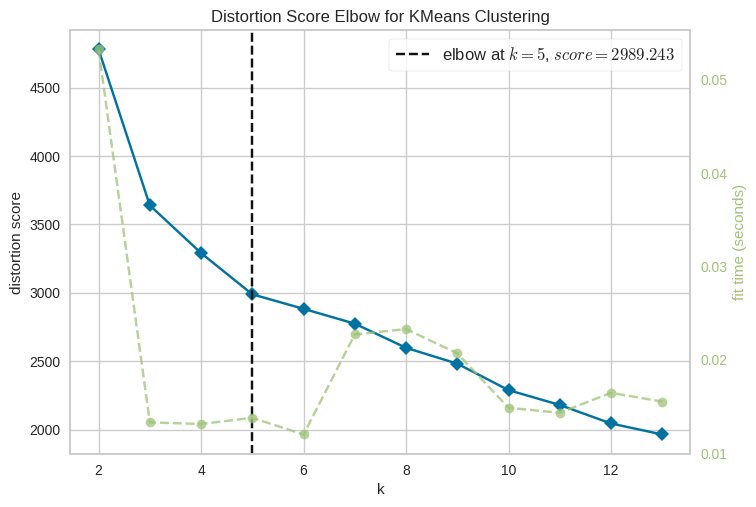

In [91]:
from yellowbrick.cluster import KElbowVisualizer  # Используется только для K-MEANS
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=13) 
Elbow_M.fit(scaler_data_drop)
Elbow_M.show();

А вот первый тест(метод локтя) говорит нам о том, что лучшее значение это 5, хотя по графику видно, что перегиб идет со значения 3. Но будем держать в голове, что и 3 и 5 можно в дальнейшем попробовать. 

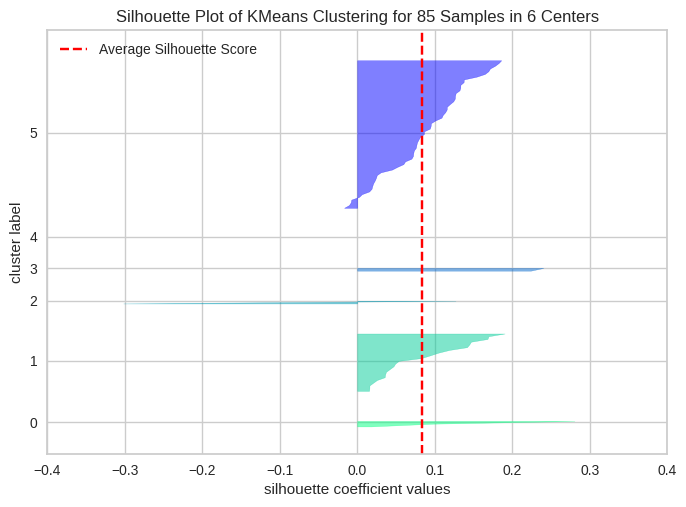

In [92]:
from yellowbrick.cluster import SilhouetteVisualizer

Silhouette = SilhouetteVisualizer(KMeans(n_clusters=6,random_state=42),colors='winter_r')

# Обучаем модель и выводим график
Silhouette.fit(scaler_data_drop)
Silhouette.show();

А вот пот оценке именно плотности кластеров, наилучшее значение это 5, при этом значение 3 по коэф. выше, но более плотная фигура на 5 кластерах.

In [93]:
silhouette_lst=[]
num_clasters=[]
for n in range(2,20):
    Kmean=KMeans(n_clusters=n,random_state=42)
    Kmean.fit(scaler_data_drop)
    silhouette_lst.append(silhouette_score(X=scaler_data_drop,labels=Kmean.predict(scaler_data_drop),random_state=42))
    num_clasters.append(n)



fig = go.Figure(layout=dict(title="метод 'силуэта'", 
                                 title_font=dict(size=24), 
                                 xaxis_title="количество кластеров", 
                                 yaxis_title="коэффициент", 
                                 width=1500, 
                                 height=500))
fig.add_trace(go.Scatter(x=num_clasters,y=silhouette_lst))

На основании двух графиков силуэта можно так же прийти к выводу, что 3 кластера самое подходящее для нашего датасета. Но ведь и значение в 5 кластеров высокое, если сравнивать с последующими.Попробуем нашу базовую модель обучить на 3х и на 5 кластерах. Вообще задача стоит найти регионы, которые наиболее нуждаются в поддержке государства.

Ну и еще один метод попробуем воспроизвести, это индекс Калинского-Харабасза. Индекс Калинского-Харабасза (также известный как коэффициент вариации) оценивает качество кластеризации путём соотношения межкластерной дисперсии и внутрикластерной дисперсии. Высокие значения индекса указывают на хорошее качество кластеризации, когда кластеры достаточно плотно заполнены внутренними элементами и ясно отделены друг от друга.

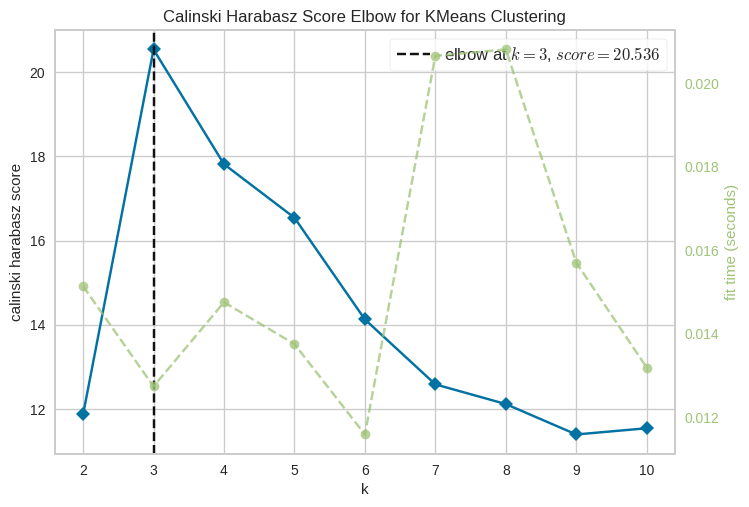

In [94]:
from yellowbrick.cluster import KElbowVisualizer  # Используется только для K-MEANS
Elbow_M = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=10,metric='calinski_harabasz') 
Elbow_M.fit(scaler_data_drop)
Elbow_M.show();

данный тест показывает опять на цифру 3.

##### 5.2. BaseModel

На основании выводов выше, обучим нашу первую модель, базовую, с количеством кластеров 3 и 5. Воспользуемся моделью K-Means, для 3х и для 5 кластеров.

In [95]:
# Обучаем нашу базовую модель с количеством кластеров 3
BaseModel_3 = KMeans(n_clusters=3,random_state=42)
BaseModel_3.fit(scaler_data_drop)

KMeans(n_clusters=3, random_state=42)

Далее визуализируем полученный результат и попробуем понять почему именно так были определены кластеры. Для этого мы понизим размерность до 2 и 3 признаков и визуализируем

In [96]:
dct_colors_clusters = {0:'#9467BD',1:"#00FFEE",2:'#FF7F0E',3:"#000000",4:"#FF00B3",-1:"#E2E2E2"}


colors_3_basemodel = [dct_colors_clusters[cluster]    for cluster in BaseModel_3.labels_]
fig = make_subplots(rows=1,cols=2,subplot_titles=['2D','3D'],specs=[[{'type':'xy'}, {'type':'scene'}]])
fig.add_trace(go.Scatter(showlegend=False,mode='markers',x=pca_data_2[0],y=pca_data_2[1],marker_color=colors_3_basemodel,text=data['Регионы']),col=1,row=1)
fig.add_trace(go.Scatter3d(showlegend=False,mode='markers',marker_color=colors_3_basemodel,x=pca_data_3[0],y=pca_data_3[1],z=pca_data_3[2],text=data['Регионы']),col=2,row=1)
fig.update_layout(title=dict(text='Кластеризация K-means BaseModel_3',x=0.5,y=0.9,),width=1200,height=500)

fig.show()


Посмотрим на важность каждого признака для нашей базовой модели, основываясь на его кластерах.  Здесь применяется ANOVA-тест (анализ дисперсий): проверяется, различаются ли средние значения признаков между кластерами. Чем сильнее разница, тем важнее признак считается.
- Тест возвращает статистику F и P-значение. Нас интересует только статистика F, так как она отражает меру различия средних значений признаков между кластерами.

In [97]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif, k=41)
selector.fit(scaler_data_drop, BaseModel_3.labels_)

bar_df = pd.DataFrame({'признак':selector.feature_names_in_[:-1],'значение':selector.scores_[:-1]})
bar_df.sort_values(by='значение',ascending=False,inplace=True)

fig = px.bar(x=bar_df['признак'],y=bar_df['значение'],width=1200,height=800)
fig.update_layout(yaxis=dict(title="Значение"),title="Важность признака для модели K-means")

Для данной модели огромную роль играет уровень инвалидов в регионе.

In [98]:
# Обучаем нашу модель с количеством кластеров 5
BaseModel_5 = KMeans(n_clusters=5,random_state=42)
BaseModel_5.fit(scaler_data_drop)

KMeans(n_clusters=5, random_state=42)

In [99]:
colors_5_basemodel = [dct_colors_clusters[cluster]    for cluster in BaseModel_5.labels_]

fig = make_subplots(rows=1,cols=2,subplot_titles=['2D','3D'],specs=[[{'type':'xy'}, {'type':'scene'}]])
fig.add_trace(go.Scatter(showlegend=False,mode='markers',x=pca_data_2[0],y=pca_data_2[1],marker_color=colors_5_basemodel,text=data['Регионы']),col=1,row=1)
fig.add_trace(go.Scatter3d(showlegend=False,mode='markers',marker_color=colors_5_basemodel,x=pca_data_3[0],y=pca_data_3[1],z=pca_data_3[2],text=data['Регионы']),col=2,row=1)
fig.update_layout(title=dict(text='Кластеризация K-means BaseModel_5',x=0.5,y=0.9,),width=1200,height=500)

fig.show()


In [100]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif, k=41)
selector.fit(scaler_data_drop, BaseModel_5.labels_)

bar_df = pd.DataFrame({'признак':selector.feature_names_in_[:-1],'значение':selector.scores_[:-1]})
bar_df.sort_values(by='значение',ascending=False,inplace=True)

fig = px.bar(x=bar_df['признак'],y=bar_df['значение'],width=1200,height=800)
fig.update_layout(yaxis=dict(title="Значение"),xaxis=dict(title=""),title="Важность признака для модели K-means")

Не совсем согласен, что именно на такие кластера должно быть разбито наше пространство,т.к. появился один кластер, состоящий из одного региона, хотя есть рядом еще регионы.

##### 5.3 Иерархическая кластеризация

Далее воспользуемся иерархической кластеризацией, т.к. она способна работать на небольших датасетах, как мой. Построим дендограмму и на ней уже попытаемся понять оптимальное количество кластеров.

In [101]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering_3 = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering_3.fit(scaler_data_drop)

AgglomerativeClustering(n_clusters=3)

In [102]:
colors_agglomerative_clustering_3 = [dct_colors_clusters[cluster]    for cluster in agglomerative_clustering_3.labels_]

fig = make_subplots(rows=1,cols=2,
                    subplot_titles=['2D','3D'],
                    vertical_spacing=0.5,column_widths=[0.3,0.6],
                    specs=[[{'type':'xy'}, {'type':'scene'}]])

fig.add_trace(go.Scatter(text=data['Регионы'],
    showlegend=False,
    name='Визуализация 2D',
    mode='markers',
    x=pca_data_2[0],
    y=pca_data_2[1],
    marker_color=colors_agglomerative_clustering_3,
    ),col=1,row=1)

fig.add_trace(go.Scatter3d(text=data['Регионы'],
    showlegend=False,
    name='Визуализация 3D',
    mode='markers',
    marker_color=colors_agglomerative_clustering_3,
    x=pca_data_3[0],
    y=pca_data_3[1],
    z=pca_data_3[2]
    ),col=2,row=1)
fig.update_layout(title=dict(text='Кластеризация agglomerative clustering',x=0.5,y=0.9,),width=1200,height=500)

fig.show()

In [103]:
from sklearn.feature_selection import SelectKBest,f_classif
selector_agglomerative_3 = SelectKBest(f_classif, k=41)
selector_agglomerative_3.fit(scaler_data_drop, agglomerative_clustering_3.labels_)

bar_df_agglomerative_3 = pd.DataFrame({'признак':selector_agglomerative_3.feature_names_in_[:-1],'значение':selector_agglomerative_3.scores_[:-1]})
bar_df_agglomerative_3.sort_values(by='значение',ascending=False,inplace=True)

fig = px.bar(x=bar_df_agglomerative_3['признак'],y=bar_df_agglomerative_3['значение'],width=1200,height=800)
fig.update_layout(yaxis=dict(title="Значение"),xaxis=dict(title=""),title="Важность признака для модели agglomerative_clustering_3")
fig.show()

Есть определенное отличие между двумя моделями при распределении на 3 кластера, но если анализировать наши признаки, то не совсем корректно, т.к. Москва, Сахалин и Магадан имеют чуть выше зарплаты чем во всем остальном регионе.

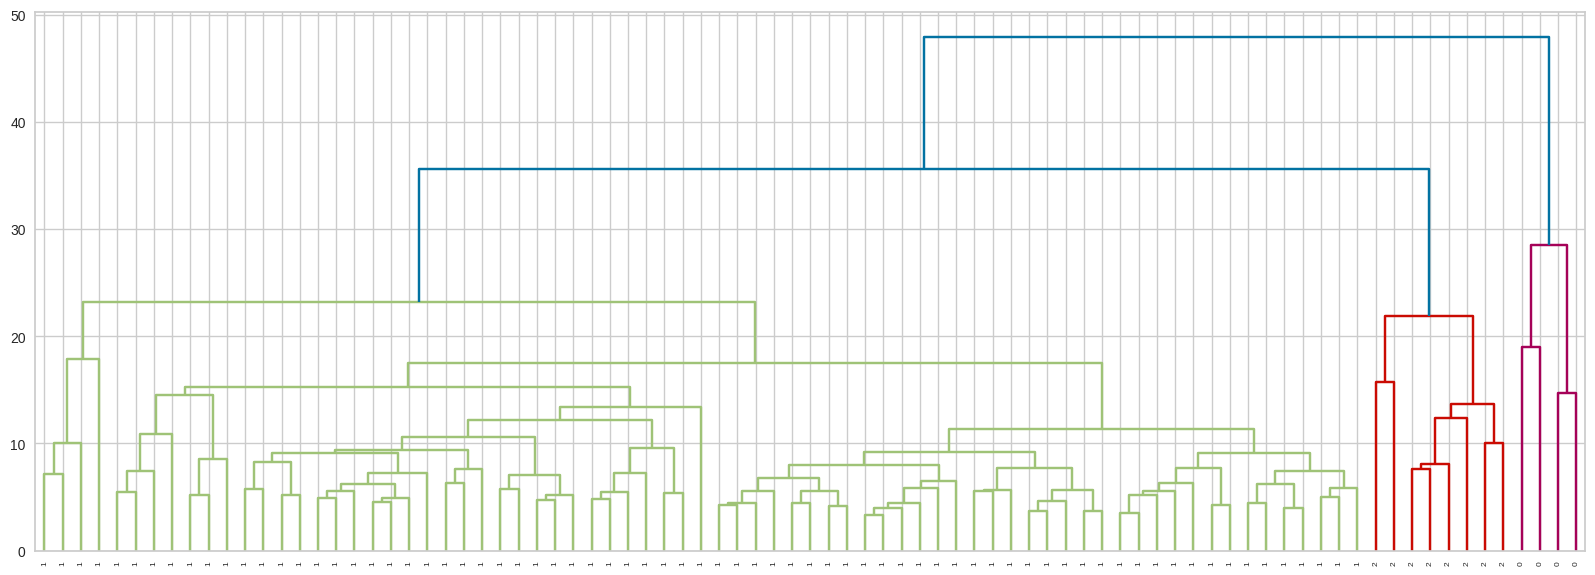

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

# рассчитаем расстояния между кластерами
linked = linkage(scaler_data_drop, method='ward')
plt.figure(figsize=(20, 7))

dendrogram(Z=linked,
            orientation='top',
            labels=agglomerative_clustering_3.labels_,
            distance_sort='descending')

plt.show()

На дендограмме конечно ярков видно, что кластеров должно быть 3, при этом один очень жирный кластер и другие два менее, но если мы проведем линию чуть выше 20, то кластеров будет пять как и ранее рассматривали. Заодно увидим, сможет ли модель справится с этим.

In [105]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering_5 = AgglomerativeClustering(
    n_clusters=5)
agglomerative_clustering_5.fit(scaler_data_drop)

AgglomerativeClustering(n_clusters=5)

In [106]:
colors_agglomerative_clustering_5 = [dct_colors_clusters[cluster]    for cluster in agglomerative_clustering_5.labels_]

fig = make_subplots(rows=1,cols=2,
                    subplot_titles=['2D','3D'],
                    vertical_spacing=0.5,column_widths=[0.3,0.6],
                    specs=[[{'type':'xy'}, {'type':'scene'}]])

fig.add_trace(go.Scatter(text=data['Регионы'],
    showlegend=False,
    name='Визуализация 2D',
    mode='markers',
    x=pca_data_2[0],
    y=pca_data_2[1],
    marker_color=colors_agglomerative_clustering_5,
    ),col=1,row=1)

fig.add_trace(go.Scatter3d(text=data['Регионы'],
    showlegend=False,
    name='Визуализация 3D',
    mode='markers',
    marker_color=colors_agglomerative_clustering_5,
    x=pca_data_3[0],
    y=pca_data_3[1],
    z=pca_data_3[2]
    ),col=2,row=1)
fig.update_layout(title=dict(text='Кластеризация K-means BaseModel',x=0.5,y=0.9,),width=1200,height=500)

fig.show()

In [107]:
from sklearn.feature_selection import SelectKBest,f_classif
selector_agglomerative_5 = SelectKBest(f_classif, k=41)
selector_agglomerative_5.fit(scaler_data_drop, agglomerative_clustering_5.labels_)

bar_df_agglomerative_5 = pd.DataFrame({'признак':selector_agglomerative_5.feature_names_in_[:-1],'значение':selector_agglomerative_5.scores_[:-1]})
bar_df_agglomerative_5.sort_values(by='значение',ascending=False,inplace=True)

fig = px.bar(x=bar_df_agglomerative_5['признак'],y=bar_df_agglomerative_5['значение'],width=1200,height=800)
fig.update_layout(yaxis=dict(title="Значение"),xaxis=dict(title=""),title="Важность признака для модели agglomerative_clustering_5")
fig.show()

## <center> 6. Итоги

##### 6.1 Анализ результатов

После того, как мы узнали порядок по важности наших признаков, мы разместим их в нашем датасете в таком же порядке, чтобы было легче анализировать кластеры.

In [108]:
# сформируем названия признаков в отдельную переменную
feature_imp =['Регионы']+list(bar_df_agglomerative_5['признак'].values) 
# добавим в наш датасет с удаленными скоррелированными признаками столбец регионы
data_sort = data_drop.copy()
data_sort.insert(0,'Регионы',data['Регионы'])
# Далее мы отфильтруем наш изначальный датасет по важности признаков модели agglomerative_clustering_5

data_sort = data_sort[feature_imp]
# добавим столбец кластеры
data_sort['кластеры'] = agglomerative_clustering_5.labels_


Далее будем сравнивать средние значения в признаке со средними значениями в каждом кластере по этому признаку, именно по такой логике выбираются наиболее важные фичи для разделения на кластеры нашей моделью.

In [109]:
cols = data_sort.columns[1:17]
fig = make_subplots(5,3,subplot_titles=cols,)
n = 0
for i in range(1,6):
    for j in range(1,4):
        sort_clusters = data_sort.groupby('кластеры')[cols[n]].mean()
        fig.add_trace(go.Bar(x=sort_clusters.index,y=sort_clusters.values,showlegend=False,marker_color=[dct_colors_clusters[i] for i in range(5)]),row=i,col=j)
        fig.add_hline(y=data_sort[cols[n]].mean(),row=i,col=j)
        n+=1
        



fig.update_layout(width=1200,height=1000,title='Распределение кластеров по топ 15 признакам')
fig.show()

Почти во всех признаках есть ощутимая разница между кластерами. В нашей стране конечно же уровень жизни зависит зачастую от добычи полезных ископаемых, а так же от условий окружаюшей среды, т.к. добыча происходит в основном в суровых условиях, поэтому и идет надбавка к зарплате.

##### 6.2. Сводная информация по кластерам

In [110]:
data[data_sort['кластеры']==0]

,Регионы,"Беременность, роды и послеродовой период",Болезни глаза и его придаточного аппарата,Болезни кожи и подкожной клетчатки,Болезни костно-мышечной системы и соединительной ткани,"Болезни крови, кроветворных органов и отдельные нарушения, вовлекающие иммунный механизм",Болезни мочеполовой системы,Болезни нервной системы,Болезни органов дыхания,Болезни органов пищеварения,...,% умерших детей в деревне,% умерших детей в городе,18_30_инвалид на 100 тыс.чел.,31_40_инвалид на 100 тыс.чел.,41_50_инвалид на 100 тыс.чел.,51_60_инвалид на 100 тыс.чел.,60_инвалид на 100 тыс.чел.,доля <16 за чертой бедности,доля 16-60 за чертой бедности,доля >60 за чертой бедности
11,Республика Дагестан,6476.0,18611.0,13314.0,7392.0,10695.0,15565.0,4200.0,100554.0,26162.0,...,0.389160,0.292480,1157,1442,1896,2575536,2766,0.058746,0.082886,0.006214
31,Чеченская Республика,8526.0,1947.0,1636.0,1873.0,5012.0,4778.0,829.0,47439.0,4603.0,...,0.239136,0.362061,1687,2682,2774,2465498,1916,0.089783,0.101807,0.012650
57,Кабардино-Балкарская Республика,3883.0,6346.0,17395.0,3430.0,1539.0,4845.0,2888.0,94900.0,11208.0,...,0.330078,0.207520,428,597,817,1601856,3132,0.090271,0.129272,0.022507
72,Республика Ингушетия,11067.0,13853.0,14796.0,11444.0,2074.0,8201.0,4179.0,107313.0,14009.0,...,0.271729,0.283691,1359,1426,2536,3283200,2894,0.118774,0.166504,0.014702
74,Карачаево-Черкесская Республика,4171.0,12036.0,11749.0,7446.0,528.0,9344.0,3812.0,191235.0,10039.0,...,0.234497,0.253906,807,1095,1650,2814595,4751,0.098572,0.116699,0.016708
77,Республика Тыва,10908.0,7514.0,14556.0,2033.0,2154.0,4457.0,2108.0,123265.0,5664.0,...,0.258301,0.288574,575,873,1270,1582333,2096,0.144531,0.160400,0.012047
79,Республика Калмыкия,7385.0,7296.0,11730.0,6102.0,1204.0,7943.0,3770.0,222954.0,7234.0,...,0.180420,0.108215,638,729,795,1738495,3965,0.112122,0.110107,0.004768
80,Республика Алтай,16569.0,18488.0,23576.0,6910.0,4514.0,12237.0,4339.0,172286.0,17424.0,...,0.710449,0.033844,410,765,969,1561919,5928,0.102112,0.131592,0.004284


#### Нулевой кластер. ####
- Данный кластер практически ничего не добывает из полезных ископаемых, значение много меньше чем среднее по регионам.
- Наименьшие показатели по валовому продукту.
- Самый большой показатель по рождаемости, по числу комнат на одного члена домохозяйства
- Самый низкий показатель по торговле, т.к. скорее всего ничего не производят.
- Самый низкий показатель по алкоголизму.
- Наименьший показатель по умершим детям в городе
- показатель по болезням тоже низкий.
- Но при этом очень высокий показатель по умершим детям на первом году жизни в деревне
- по количеству инвалидов трудоспособного возраста.
- Очень высокий показатель детей за чертой бедности

Все это указывает на то, что регионы сами по себе небольшие, в основном люди живут в деревнях, где частные дома приобладают для заведения скота и большой семьи, поэтому квадратура на одного человека больше чем в городе. Так же на это указывает высокая смертность в деревнях детей на первом году жизни. Есть месторождения полезных ископаемых но в очень маленьких количествах, ничем не торгуют от этого и валовый продукт не высокий. И как следсвие того, что особо нечем регионам похвастаться уровень среднедушевых доходов от 16700 до 27600 рублей в месяц. 

In [111]:
df[data_sort['кластеры']==1]

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
83,Чукотский автономный округ,0.0,50288,Дальневосточный федеральный округ,537.0,1.0,7.0,1641.0,175.0,225.0,...,15,322,143,3,11,0,0,282,0,0
84,Ненецкий АО.(Арх.обл.),0.0,44111,Северо-Западный федеральный округ,594.0,2.0,2.0,2941.0,137.0,214.0,...,20,249,126,4,27,0,0,211,1,0


#### Первый кластер. ####

-  Валовый продукт очень высокий, т.к. численность населения не более 51 тыс. человек, т.к. добыча полезных ископаемых на уровне среднего.
-  Уровень новорожденных так же находится выше среднего.
-  А вот уже расчет квадратуры на одного члена домохозяйсва ниже среднего, что похоже уже на высокий уровень цен на жилье, как в больших городах.
-  Низкий уровень детей за чертой безности, так же низкий уровень инвалидов.
-  При этом видим, что уровень болезней высокий из-за сурового климата, а так же видим, что уровень смертности детей высокий, но... тут надо понимать, что если с такой численностью населения умрет один ребенок, то это сразу будет очень высокий показатель.
-  Самый высокий уровень алкоголизма, опять же связано с тем, что климат очень холодный и суровый.


Итак первый кластер это регионы, где очень высокий уровень зарплат, но при этом численность регионов не высокая, Рождаемость выше среднего, т.к. численность небольшая и прирост в количестве детей даже не большой будет показывать высокий показатель. По смертности так же высокий уровень, Регион самый пьющий, т.к. связан с суровыми условиями как жизни так и труда. Скорее всего преобладает жизнь городская, в квартирах, т.к. есть стесненность в жилье. Невысокий уровень инвалидов, оно и правильно, т.к. люди там в основном по работе приезжие, но при этом очень высокий уровень болезней органов дыхания из-за добычи полезных ископаемых. И самое главное уровень соц. поддержки из бюджета очень невысокий, т.к. бюджет регионов высокий для такой численности населения. В среднем зарплаты начинаются до 90 тыс. рублей в месяц. 



In [112]:
df[data_sort['кластеры']==2]

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
0,Москва,12.0,12678079,Центральный федеральный округ,123524.0,10.0,440.0,991311.0,28857.0,44436.0,...,480,16228,9037,103,4090,4599,151,6614,891,5
55,Республика Саха (Якутия),0.0,971996,Дальневосточный федеральный округ,12957.0,33.0,34.0,53342.0,4109.0,5587.0,...,335,4479,2183,43,303,132,7,4092,28,0
73,Сахалинская область,0.0,488257,Дальневосточный федеральный округ,5591.0,5.0,20.0,21570.0,1353.0,2165.0,...,250,3047,1607,21,332,52,0,1793,58,0
82,Магаданская область,0.0,140149,Дальневосточный федеральный округ,1314.0,0.0,4.0,5063.0,322.0,596.0,...,59,932,512,12,43,24,12,592,7,0


#### Второй кластер. ####
 
- Данный кластер  с очень высоким показателем добычи полезных ископаемых, стоит на втором месте, при этом тут Москва даже, что добывает.. непонятно :)
- Но уже видим, что валовый продукт ниже чем в первом кластере, т.к. численность населения тут намного выше, чем в прошлом кластере.
- Уровень новорожденных так же выше среднего.
- А тут уже наблюдаем, что число жилих комнат в расчете на одного члена домохозяйства самый низкий, это так же нам говорит, что преобладает городской тип домохозяйства.
- Уровень бедности детей низкий как и уровень инвалидов.
- А вот уровень торговли в данных регионах самый высокий
- Уровень алкоголизма находится на втором месте, но не особо сильно отличается от других кластеров, кроме первого.
- Болезни на среднем уровне
- Преобладает смертность детей на первом году жизни в городе, чем в деревне.
- Расходы на соц. политику ниже среднего.
  

Численность населения в регионах разные, от 140 тыс. до 12 млн. человек., при этом номинальные зарплаты начинаются до 77 тыс. рублей, при этом среднедушевые доходы от 46 тыс. рублей это в республике Саха(Якутия), с чем связано, многие жители проживают в удаленных поселениях, где ограничены возможности трудоустройства. Отсутствие инфраструктуры и транспортной доступности затрудняет получение высоких зарплат, характерных для крупных компаний, расположенных преимущественно в городах. Коренное население Республики Саха традиционно занимается охотой, рыбалкой и животноводством. Переход к современным формам занятости осложнен недостатком образования и квалификации, необходимых для работы в добывающих отраслях. Но в данном кластере так же есть Москва, которая на первый взгляд живет своей жизнью и якобы сильно ушла вперед по зарплатам, но это не так. Очень развита торговля, но и не без алкоголизма, крупный город как Москва , т.к. это мегаполис и алкоголь тут как разрядка от суеты, а вот в других регионах в кластере алкоголизм связан из-за погодных условий больше.


In [113]:
df[data_sort['кластеры']==3]

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
27,ХМАО(Тюменская обл.),1.0,1674676,Уральский федеральный округ,20605.0,5.0,70.0,53254.0,3895.0,5877.0,...,328,6132,3074,14,643,123,0,3614,93,1
70,ЯНАО(Тюменская обл.),0.0,544444,Уральский федеральный округ,7092.0,10.0,15.0,13903.0,1271.0,1484.0,...,76,2254,1203,10,203,18,8,1690,43,1


#### Третий кластер. ####

- Данный кластер является лидером по добыче полезных ископаемых и далеко ушел даже от второго кластера.
- Естественно и валовый продукт на душу населения тоже огромный, т.к. и численность регионов до 1.6 млн человек.
- Уровень рождаемости выше среднего
- Оборот розничной торговли тоже выше среднего
- Инвалидность низкая
- Число детей за чертой бедностью тоже низкая, это говорит о высоком уровне зарплат.
- Так же преобладает городской тип домохозяйства, т.к. в расчете на одного члена семьи квадратура не высокая.
- По болезням срезний уровень
- И по смертности детей на первом году жизни уровень тоже ниже среднего, но приобладает смертность в городе.

Если обобщить информацию выше, данный кластер по уровню зарплат из-за того, что численность выше чем у первого кластера по зарплатам чуть ниже от 80 до 111 тыс. руб. в месяц. Но при этом конечно высокий уровень добычи полезных ископаемых. Алкоголизм на уровне среднее. Невысокая инвалидность, крайне низкий показатель детей за чертой бедности, среднее по болезням
Но опять же суровый климат остается важным фактором для уровня зарплат. И главное уровень расходов на соц. политику не высокий, ниже среднего, это говорит о том, что бюджет тут высокий.

In [114]:
df[data_sort['кластеры']==4]

,Регионы,уровень населения,Численность населения,Федеральный округ,Новорожденные,число умерших детей на первом году жизни в деревне 2020,число умерших детей на первом году жизни в городе 2020,всего инвалидов,18_30_инвалид,31_40_инвалид,...,несовершеннолетними или при их соучастии,ранее совершавшими преступления,в том числе ранее судимыми,группой лиц,группой лиц по предварительному сговору,организованной группой,преступным сообществом (преступной организацией),в состоянии алкогольного опьянения,наркотического опьянения,токсического опьянения
1,Московская область,7.0,7690863,Центральный федеральный округ,79107.0,26.0,220.0,412799.0,15893.0,26311.0,...,767,21162,14852,262,3455,481,17,9491,714,0
2,Краснодарский край,5.0,5675462,Южный федеральный округ (с 29.07.2016),59235.0,91.0,139.0,429194.0,18213.0,28292.0,...,936,18776,10268,97,2523,149,7,6290,119,3
3,Санкт-Петербург,5.0,5398064,Северо-Западный федеральный округ,55439.0,0.0,191.0,562262.0,12651.0,20695.0,...,443,10395,6062,71,1484,375,20,3099,457,0
4,Свердловская область,4.0,4310681,Уральский федеральный округ,43991.0,38.0,144.0,271245.0,12950.0,22756.0,...,1613,20390,12233,90,2547,233,4,11736,146,6
5,Ростовская область,4.0,4197821,Южный федеральный округ (с 29.07.2016),36485.0,76.0,124.0,348063.0,14426.0,30117.0,...,848,16524,9758,87,2372,100,0,5731,103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Республика Хакасия,0.0,534262,Сибирский федеральный округ,5360.0,5.0,16.0,27107.0,1473.0,2751.0,...,238,4785,2507,17,239,23,24,2651,50,0
75,Республика Адыгея,0.0,463088,Южный федеральный округ (с 29.07.2016),4418.0,7.0,7.0,32747.0,1435.0,2389.0,...,76,1656,679,2,180,49,0,605,20,0
76,Севастополь,0.0,449138,Южный федеральный округ (с 29.07.2016),4225.0,0.0,15.0,20450.0,752.0,1486.0,...,71,1089,586,10,164,11,0,662,22,0
78,Камчатский край,0.0,313016,Дальневосточный федеральный округ,3240.0,3.0,11.0,13452.0,810.0,1209.0,...,160,1921,1016,15,158,22,3,1103,17,0


#### Четвертый кластер. ####

- Данный кластер с низким показателем добычи полезных ископаемых.
- А поэтому и валовый продукт не высокий.
- Рождаемость тут ниже среднего.
- Практически все показатели тут на уровне среднего.

Если обобщить, то это кластер со средними показателями и занимает основную часть регионов нашей страны, поэтому и самый многочисленный. Радует, что и алкоголизм тут уровень средний.
Расходы из бюджета тоже средний по стране. В данном кластере 69 регионов, которые конечно же являются центральной частью страны.

Наконец-то проверим:

- влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе;
- связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;
- какие ещё зависимости можно наблюдать относительно социально незащищённых слоёв населения.


По первому вопросу, ответ очевидный, конечно на разбитие по кластерам и выведения кластера, который наиболее нуждается в помощи государства уровень инвалидов в регионе и уровень детей за чертой бедности влияет. 

Второй вопрос тоже понятен, что уровень жизни в регионе напрямую связан с уровнем добычи полезных ископаемых, а т.к. другие признаки по производствам скоррелированы с добычей, то чем больше в регионе что-то добывают и производят тем выше уровень жизни жителей. Это мы все разобрали выше. 



Еще одна зависимость, это уровень болезней органов дыхания, регионы, где уровень жизни выше, но при этом мы понимаем почему(добыча и производство) там и выше данный показатель на 100 тыс. человек. И конечно признак, я даже думаю как индикатор, это расходы на соц. политику, чем уровень жизни в регионе ниже, тем выше процент, т.к. низкий бюджет